In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.stats import poisson
from astropy.io import ascii
from sklearn.linear_model import LinearRegression
#import seaborn as sns
import pandas as pd
from astropy.table import Table
from astropy.io import fits
from scipy.odr import *
import os
import astropy
import astropy.units as u
from astropy.coordinates import SkyCoord
def match_catalogs(samp_x, samp_y, cat_x, cat_y, max_sep=0.1*u.arcsec):
    if not isinstance(max_sep, astropy.units.quantity.Quantity):
        max_sep = max_sep * u.degree
    sample = SkyCoord(ra=samp_x*u.degree, dec=samp_y*u.degree)
    catalog = SkyCoord(ra=cat_x*u.degree, dec=cat_y*u.degree)
    idx, d2d, d3d = sample.match_to_catalog_sky(catalog)
    samp_sel = d2d < max_sep
    return samp_sel, idx
#import seaborn as sns
from scipy import stats

In [7]:
hdu2=fits.open('COSMOSWeb_mastercatalog_v1_lephare.fits')
hdu2.info()


FileNotFoundError: [Errno 2] No such file or directory: 'COSMOSWeb_mastercatalog_v1_lephare.fits'

In [3]:
hdu2[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  344 / length of dimension 1                          
NAXIS2  =               784016 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   43 / number of table fields                         
EXTNAME = 'LEPHARE '           / extension name                                 
TTYPE1  = 'zfinal  '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'type    '                                                            
TFORM2  = 'K       '        

In [4]:
hdu=fits.open('COSMOSWeb_mastercatalog_v1_photom_primary.fits')
hdu.info()

Filename: COSMOSWeb_mastercatalog_v1_photom_primary.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  PHOTOMETRY HOTCOLD AND SE++    1 BinTableHDU    603   784016R x 287C   [K, K, 3A, K, D, D, D, D, D, D, D, D, D, 4A, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, 5D, 5D, 5D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, L, L, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D

In [23]:
file_path_class1 = 'Par024lines_reconciled_with_flags.dat'
df1 = pd.read_csv(file_path_class1,header=0, sep='\s+')#'ha_6565_flux',
#df1 = df1[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','ha_6550_6565_6585_flux','hb_4863_flux','o3_4959_5007_flux','o2_3727_3730_flux','pg_10941_flux','pb_12822_flux','s3_9069_9532_flux','emline_flag']]
#df1['Par']  = ['Par024' for _ in range(len(df1))] #np.full(len(df1),'Par024')
df1




<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_3921/2478155331.py:2: SyntaxWarning: invalid escape sequence '\s'
  df1 = pd.read_csv(file_path_class1,header=0, sep='\s+')#'ha_6565_flux',


,objid,redshift,redshift_error,ra_obj,dec_obj,f140w_mag,a_image_obj,b_image_obj,snr_tot_others,chisq,...,ne3_3869_ratio,ne3_3869_contam,snr_Lya,snr_OII,snr_OIII,snr_Hb,snr_Ha,snr_Pb,snr_SIII,emline_flag
0,8,1.96988,0.00000,150.142174,2.476397,25.52,3.587,2.976,7.33,9.88,...,0.0,0,-1.0,4.067612,8.238994,1.587156,-1.000000e+00,-1.0,-1.0,2
1,9,1.97364,0.00025,150.142183,2.476540,24.11,4.029,2.975,41.54,15.14,...,0.0,0,-1.0,24.607843,52.884615,11.690141,-1.000000e+00,-1.0,-1.0,1
2,31,0.81933,0.00000,150.143154,2.478128,26.57,2.899,2.584,8.65,9.35,...,0.0,0,-1.0,-1.000000,-1.000000,-1.000000,8.640646e+00,-1.0,-1.0,4
3,91,2.11985,0.00115,150.144131,2.480157,24.91,3.009,2.087,10.53,10.20,...,0.0,0,-1.0,3.012912,11.250000,1.484127,-1.000000e+00,-1.0,-1.0,2
4,143,2.13190,0.00000,150.133466,2.481628,24.23,6.425,3.035,9.00,15.09,...,0.0,0,-1.0,8.907035,9.005848,0.035373,-1.000000e+00,-1.0,-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3703,1.42841,0.00177,150.126082,2.517314,25.87,3.036,2.688,9.20,14.32,...,0.0,0,-1.0,-1.000000,10.043668,3.591923,2.711538e+00,-1.0,-1.0,2
125,3713,2.28332,0.00099,150.131621,2.517379,24.77,4.382,3.210,4.47,13.08,...,0.0,0,-1.0,5.015674,4.100840,2.139918,-1.000000e+00,-1.0,-1.0,2
126,3721,0.59215,0.00041,150.119086,2.517642,25.10,4.774,2.951,0.00,-5.07,...,0.0,0,-1.0,-1.000000,-1.000000,-1.000000,2.449438e-07,-1.0,-1.0,9
127,3726,2.29374,0.00209,150.127834,2.517718,25.25,4.258,2.594,3.12,10.53,...,0.0,0,-1.0,3.122137,2.246193,0.215859,-1.000000e+00,-1.0,-1.0,4


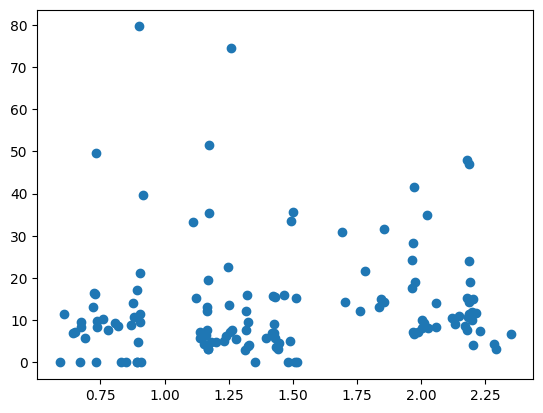

In [69]:
plt.scatter(df1['redshift'],df1['snr_tot_others'])
#plt.ylim(0,4000)

(0.0, 4000.0)

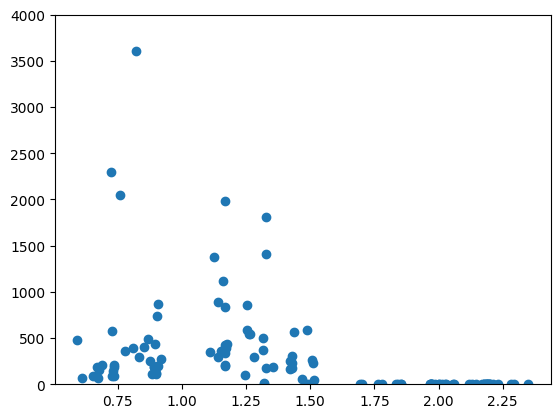

In [68]:
plt.scatter(df1['redshift'],df1['ha_6550_6565_6585_flux'])
plt.ylim(0,4000)

In [240]:
#file_path_class1 = 'Par024lines_reconciled_with_flags.dat'
#df6 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
#df6 = df6[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Pb','snr_SIII','emline_flag']]
#df6['Par']  = ['Par024' for _ in range(len(df6))]
#df6

file_path_class1 = 'Par024lines_reconciled_with_flags.dat'
df1 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df1 = df1[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','ha_6550_6565_6585_flux','ha_6565_flux','snr_Ha','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df1['Par']  = ['Par024' for _ in range(len(df1))]
df1

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_3921/3785404166.py:8: SyntaxWarning: invalid escape sequence '\s'
  df1 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')


,objid,redshift,redshift_error,ra_obj,dec_obj,snr_tot_others,snr_OII,snr_OIII,snr_Hb,ha_6550_6565_6585_flux,ha_6565_flux,snr_Ha,snr_Ha,snr_Pb,snr_SIII,emline_flag,Par
0,8,1.96988,0.00000,150.142174,2.476397,7.33,4.067612,8.238994,1.587156,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.0,-1.0,2,Par024
1,9,1.97364,0.00025,150.142183,2.476540,41.54,24.607843,52.884615,11.690141,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.0,-1.0,1,Par024
2,31,0.81933,0.00000,150.143154,2.478128,8.65,-1.000000,-1.000000,-1.000000,6.420000e-18,6.220000e-18,8.640646e+00,8.640646e+00,-1.0,-1.0,4,Par024
3,91,2.11985,0.00115,150.144131,2.480157,10.53,3.012912,11.250000,1.484127,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.0,-1.0,2,Par024
4,143,2.13190,0.00000,150.133466,2.481628,9.00,8.907035,9.005848,0.035373,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.0,-1.0,1,Par024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3703,1.42841,0.00177,150.126082,2.517314,9.20,-1.000000,10.043668,3.591923,2.820000e-17,2.730000e-17,2.711538e+00,2.711538e+00,-1.0,-1.0,2,Par024
125,3713,2.28332,0.00099,150.131621,2.517379,4.47,5.015674,4.100840,2.139918,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.0,-1.0,2,Par024
126,3721,0.59215,0.00041,150.119086,2.517642,0.00,-1.000000,-1.000000,-1.000000,4.360000e-17,4.220000e-17,2.449438e-07,2.449438e-07,-1.0,-1.0,9,Par024
127,3726,2.29374,0.00209,150.127834,2.517718,3.12,3.122137,2.246193,0.215859,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.0,-1.0,4,Par024


In [14]:
file_path_class1 = 'Par024lines_reconciled_with_flags.dat'
df1 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df1 = df1[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df1['Par']  = ['Par024' for _ in range(len(df1))]

file_path_class1 = 'Par051lines_reconciled_with_flags.dat'
df2 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df2 = df2[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df2['Par']  = ['Par051' for _ in range(len(df2))]

file_path_class1 = 'Par025lines_reconciled_with_flags.dat'
df3 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df3 = df3[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df3['Par']  = ['Par025' for _ in range(len(df3))]

file_path_class1 = 'Par023lines_reconciled_with_flags.dat'
df4 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df4 = df4[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df4['Par']  = ['Par023' for _ in range(len(df4))]

file_path_class1 = 'Par053lines_reconciled_with_flags.dat'
df5 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df5 = df5[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df5['Par']  = ['Par053' for _ in range(len(df5))]

file_path_class1 = 'Par026lines_reconciled_with_flags.dat'
df6 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df6 = df6[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df6['Par']  = ['Par026' for _ in range(len(df6))]

file_path_class1 = 'Par003lines_reconciled_with_flags.dat'
df7 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df7 = df7[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df7['Par']  = ['Par003' for _ in range(len(df7))]

file_path_class1 = 'Par028lines_reconciled_with_flags.dat'
df8 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df8 = df8[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df8['Par']  = ['Par028' for _ in range(len(df8))]

file_path_class1 = 'Par052lines_reconciled_with_flags.dat'
df9 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df9 = df9[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df9['Par']  = ['Par052' for _ in range(len(df9))]

file_path_class1 = 'Par017lines_catalog_matt_with_flags.dat'
df10 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df10 = df10[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df10['Par']  = ['Par017' for _ in range(len(df10))]

file_path_class1 = 'Par005lines_reconciled_with_flags.dat'
df11 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df11 = df11[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df11['Par']  = ['Par005' for _ in range(len(df11))]

file_path_class1 = 'Par006lines_reconciled_with_flags.dat'
df12 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df12 = df12[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df12['Par']  = ['Par006' for _ in range(len(df12))]

file_path_class1 = 'Par020lines_reconciled_with_flags.dat'
df13 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df13 = df13[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df13['Par']  = ['Par020' for _ in range(len(df13))]

file_path_class1 = 'Par049lines_reconciled_with_flags.dat'
df15 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
df15 = df15[["objid","redshift",'redshift_error','ra_obj','dec_obj','snr_tot_others','snr_OII','snr_OIII','snr_Hb','snr_Ha','snr_Pb','snr_SIII','emline_flag']]
df15['Par']  = ['Par049' for _ in range(len(df15))]

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df15], ignore_index=True)
df


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:37: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:47: SyntaxWarning: invalid escape sequence '\s'
<>:52: SyntaxWarning: invalid escape sequence '\s'
<>:57: SyntaxWarning: invalid escape sequence '\s'
<>:62: SyntaxWarning: invalid escape sequence '\s'
<>:67: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:17: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escap

,objid,redshift,redshift_error,ra_obj,dec_obj,snr_tot_others,snr_OII,snr_OIII,snr_Hb,snr_Ha,snr_Pb,snr_SIII,emline_flag,Par
0,8.0,1.96988,0.00000,150.142174,2.476397,7.33,4.067612,8.238994,1.587156,-1.000000,-1.0,-1.0,2.0,Par024
1,9.0,1.97364,0.00025,150.142183,2.47654,41.54,24.607843,52.884615,11.690141,-1.000000,-1.0,-1.0,1.0,Par024
2,31.0,0.81933,0.00000,150.143154,2.478128,8.65,-1.000000,-1.000000,-1.000000,8.640646,-1.0,-1.0,4.0,Par024
3,91.0,2.11985,0.00115,150.144131,2.480157,10.53,3.012912,11.250000,1.484127,-1.000000,-1.0,-1.0,2.0,Par024
4,143.0,2.13190,0.00000,150.133466,2.481628,9.00,8.907035,9.005848,0.035373,-1.000000,-1.0,-1.0,1.0,Par024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,2365.0,2.67948,0.00206,149.708403,2.070837,6.09,-1.000000,7.247619,3.213920,-1.000000,-1.0,-1.0,2.0,Par049
2208,2529.0,2.87519,0.00000,149.691295,2.073345,4.45,-1.000000,5.026178,3.618785,-1.000000,-1.0,-1.0,2.0,Par049
2209,2608.0,1.83314,0.00000,149.703272,2.07377,0.00,-1.000000,-1.000000,-1.000000,2.987179,-1.0,-1.0,4.0,Par049
2210,2703.0,1.72349,0.00315,149.695108,2.076333,8.57,-1.000000,-1.000000,-1.000000,8.557047,-1.0,-1.0,4.0,Par049


<Axes: xlabel='Par'>

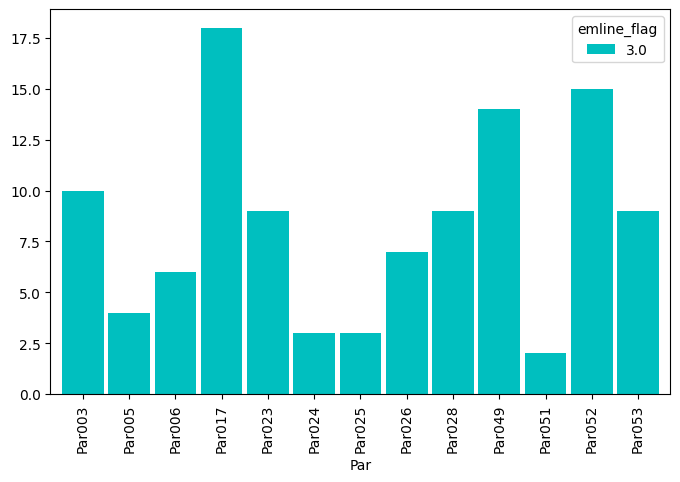

In [12]:
dfcut=df[df['emline_flag']==3]
dfcut
counts = dfcut.pivot_table(
    index="Par",
    columns="emline_flag",
    aggfunc="size",
    fill_value=0
)

colors3=['c','b','m','r']
counts.plot(
    kind="bar",
    width=0.9,
    stacked=True,
    color=colors3,
    #colormap="tab20b",   # or any other colormap
    figsize=(8, 5)
)

,objid,redshift,redshift_error,ra_obj,dec_obj,snr_tot_others,snr_OII,snr_OIII,snr_Hb,snr_Ha,snr_Pb,snr_SIII,emline_flag,Par
0,8,1.96988,0.00000,150.142174,2.476397,7.33,4.067612,8.238994,1.587156,-1.000000e+00,-1.0,-1.0,2,Par024
1,9,1.97364,0.00025,150.142183,2.476540,41.54,24.607843,52.884615,11.690141,-1.000000e+00,-1.0,-1.0,1,Par024
2,31,0.81933,0.00000,150.143154,2.478128,8.65,-1.000000,-1.000000,-1.000000,8.640646e+00,-1.0,-1.0,4,Par024
3,91,2.11985,0.00115,150.144131,2.480157,10.53,3.012912,11.250000,1.484127,-1.000000e+00,-1.0,-1.0,2,Par024
4,143,2.13190,0.00000,150.133466,2.481628,9.00,8.907035,9.005848,0.035373,-1.000000e+00,-1.0,-1.0,1,Par024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3703,1.42841,0.00177,150.126082,2.517314,9.20,-1.000000,10.043668,3.591923,2.711538e+00,-1.0,-1.0,2,Par024
125,3713,2.28332,0.00099,150.131621,2.517379,4.47,5.015674,4.100840,2.139918,-1.000000e+00,-1.0,-1.0,2,Par024
126,3721,0.59215,0.00041,150.119086,2.517642,0.00,-1.000000,-1.000000,-1.000000,2.449438e-07,-1.0,-1.0,9,Par024
127,3726,2.29374,0.00209,150.127834,2.517718,3.12,3.122137,2.246193,0.215859,-1.000000e+00,-1.0,-1.0,4,Par024


[ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0 16  6  5  7  3  0  0 13  5
  4  3  2  1  3  0  0  0  1  0  0  0  0  0  0]
[ 0  0  0  0  0  0  3 20  5 10 38 20 20 12  0  6  6  9  7  2  0  0  0  1
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  2  5 12  9 11 28 28 18 15  0 10  3  4 14  9  0  0  1  1
  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  1  0  3  2  0  0  0  0  6  5  4  2  7  0  0  4  8
 10  8  6 12  6  1  0  0  1  3  1  1  0  1  1]
[ 0  1  0  0  0  0 11 11 10  5 11 18 21  7  1  4 18 24 13  2  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  8 12 14  0 16 15 11  8  2  2  4 15 17  4  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  8 15 24  4 20 18 15  9  1  7  5 11 10 13  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  1  1  0  0 10 15 19  8 25 17 17  2  2  9  5 12 11  6  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 1  0  1  2  0  1  9 15 16  3  6 38 21 

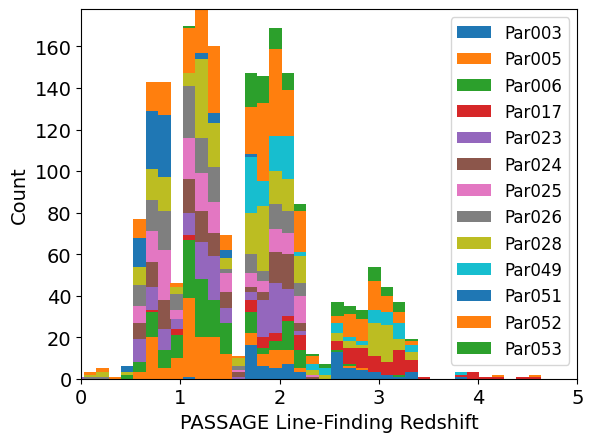

In [75]:

nbins=40
bins = np.linspace(np.min(df['redshift']),np.max(df['redshift']),nbins)#np.arange(0,4,20)
grouped = df.groupby('Par')
print(grouped)
bottom = np.zeros(len(bins) - 1)
for label, group in grouped:
    #print(label,group)
    #plt.hist(group['redshift'])
    #plt.show()
    counts, _ = np.histogram(group['redshift'], bins=bins)
    print(counts)
    plt.bar(bins[:-1], counts, width=5/nbins, bottom=bottom, label=label, alpha=1)
    bottom += counts  # update bottom for stacking

plt.xlabel('PASSAGE Line-Finding Redshift',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,5)
#plt.title('Histogram of Redshifts')
plt.legend(fontsize=12)
plt.show()


[ 0  0  1  0  0  0  7 12 10 11 71 96 79 29  4 40 64 80 49 39  7  1  8  4
  6 20 23  5  8  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  1  0  0  8  6  3  4 34 26 30 11  0 18 35 27 34 21  1  0 11 16
 12 19  7 18  4  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  2  2  7 13  1  4  9  1  0  6 10  9
  9  9 11 12  4  0  0  0  0  0  0  0  0  0  0]
[ 1  1  1  4  1  5 42 93 77 25 44 41 31 19  0 65 40 45 48 22  4  0  2  3
  2  6  0  2  1  1  0  0  2  2  1  2  0  1  1]
[ 0  0  1  0  0  1 11 21 35  0  1  3  5  7  0  6  0  1  0  0  0  0  1  0
  1  0  1  0  1  0  0  0  0  1  0  0  0  0  1]


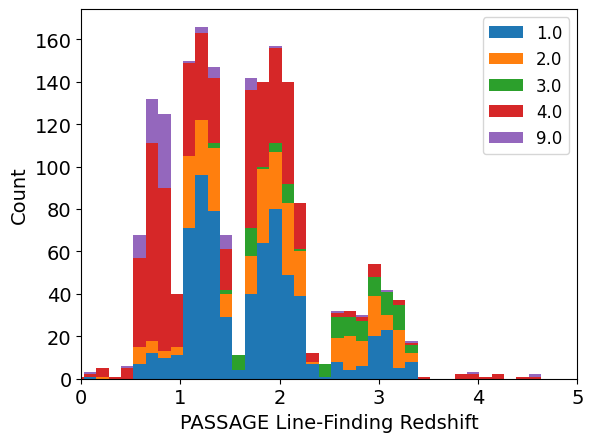

In [76]:

nbins=40
bins = np.linspace(np.min(df['redshift']),np.max(df['redshift']),nbins)#np.arange(0,4,20)
grouped = df.groupby('emline_flag')
print(grouped)
bottom = np.zeros(len(bins) - 1)
for label, group in grouped:
    #print(label,group)
    #plt.hist(group['redshift'])
    #plt.show()
    counts, _ = np.histogram(group['redshift'], bins=bins)
    print(counts)
    plt.bar(bins[:-1], counts, width=5/nbins, bottom=bottom, label=label, alpha=1)
    bottom += counts  # update bottom for stacking

plt.xlabel('PASSAGE Line-Finding Redshift',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(0,5)
#plt.title('Histogram of Redshifts')
plt.legend(fontsize=12)
plt.show()


[786, 607, 605]


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_23088/3172123358.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2 Filters' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'grism'] = '2 Filters'


Text(0.5, 1.0, 'PASSAGE Line Counts')

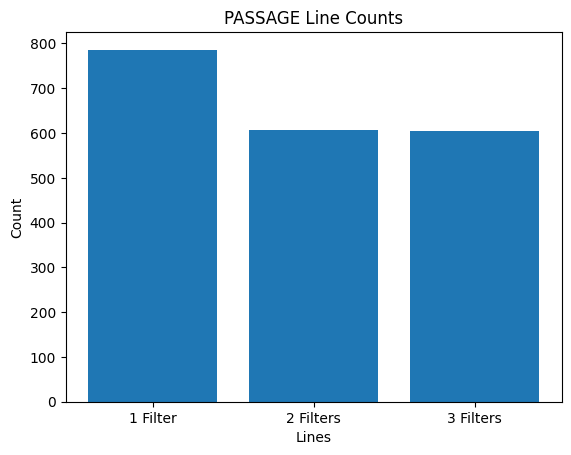

In [77]:
grisms=['1 Filter', '2 Filters', '3 Filters']
g1=0
g2=0
g3=0

df['grism'] = 0

for i in range(len(df)):
    if df['Par'][i]=='Par003':
        g1+=1
        df.at[i, 'grism'] = '1 Filter'
    if df['Par'][i]=='Par005':
        g1+=1
        df.at[i, 'grism'] = '2 Filters'
    if df['Par'][i]=='Par006':
        g1+=1
        df.at[i, 'grism'] = '2 Filters'
    if df['Par'][i]=='Par017':
        g1+=1
        df.at[i, 'grism'] = '1 Filter'
    if df['Par'][i]=='Par049':
        g1+=1
        df.at[i, 'grism'] = '1 Filter'
    if df['Par'][i]=='Par051':
        g1+=1
        df.at[i, 'grism'] = '1 Filter'
    if df['Par'][i]=='Par053':
        g1+=1
        df.at[i, 'grism'] = '1 Filter'
    if df['Par'][i]=='Par023':
        g2+=1
        df.at[i, 'grism'] = '2 Filters'
    if df['Par'][i]=='Par024':
        g2+=1
        df.at[i, 'grism'] = '2 Filters'
    if df['Par'][i]=='Par025':
        g2+=1
        df.at[i, 'grism'] = '2 Filters'
    if df['Par'][i]=='Par026':
        g2+=1
        df.at[i, 'grism'] = '2 Filters'
    if df['Par'][i]=='Par028':
        g3+=1
        df.at[i, 'grism'] = '3 Filters'
    if df['Par'][i]=='Par052':
        g3+=1
        df.at[i, 'grism'] = '3 Filters'

        
        
values=[g1,g2,g3]
print(values)
plt.bar(grisms, values)
plt.xlabel('Lines')
plt.ylabel('Count')
plt.title('PASSAGE Line Counts')

In [78]:
df

,objid,redshift,redshift_error,ra_obj,dec_obj,snr_tot_others,snr_OII,snr_OIII,snr_Hb,snr_Ha,snr_Pb,snr_SIII,emline_flag,Par,grism
0,8.0,1.96988,0.00000,150.142174,2.476397,7.33,4.067612,8.238994,1.587156,-1.000000,-1.0,-1.0,2.0,Par024,2 Filters
1,9.0,1.97364,0.00025,150.142183,2.47654,41.54,24.607843,52.884615,11.690141,-1.000000,-1.0,-1.0,1.0,Par024,2 Filters
2,31.0,0.81933,0.00000,150.143154,2.478128,8.65,-1.000000,-1.000000,-1.000000,8.640646,-1.0,-1.0,4.0,Par024,2 Filters
3,91.0,2.11985,0.00115,150.144131,2.480157,10.53,3.012912,11.250000,1.484127,-1.000000,-1.0,-1.0,2.0,Par024,2 Filters
4,143.0,2.13190,0.00000,150.133466,2.481628,9.00,8.907035,9.005848,0.035373,-1.000000,-1.0,-1.0,1.0,Par024,2 Filters
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2365.0,2.67948,0.00206,149.708403,2.070837,6.09,-1.000000,7.247619,3.213920,-1.000000,-1.0,-1.0,2.0,Par049,1 Filter
1994,2529.0,2.87519,0.00000,149.691295,2.073345,4.45,-1.000000,5.026178,3.618785,-1.000000,-1.0,-1.0,2.0,Par049,1 Filter
1995,2608.0,1.83314,0.00000,149.703272,2.07377,0.00,-1.000000,-1.000000,-1.000000,2.987179,-1.0,-1.0,4.0,Par049,1 Filter
1996,2703.0,1.72349,0.00315,149.695108,2.076333,8.57,-1.000000,-1.000000,-1.000000,8.557047,-1.0,-1.0,4.0,Par049,1 Filter


In [79]:
312+607+605

1524

/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_23088/3162236342.py:89: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'OIII & OII' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'catagory'] = r'OIII & OII'


lost objid                  332.0
redshift             0.73415
redshift_error       0.00101
ra_obj            150.144403
dec_obj             2.484732
snr_tot_others           0.0
snr_OII                 -1.0
snr_OIII                -1.0
snr_Hb                  -1.0
snr_Ha                   0.0
snr_Pb                  -1.0
snr_SIII                 0.0
emline_flag              9.0
Par                   Par024
grism              2 Filters
catagory                 NaN
Name: 7, dtype: object
lost objid                 2108.0
redshift             0.89225
redshift_error           0.0
ra_obj            150.128072
dec_obj              2.50121
snr_tot_others           0.0
snr_OII                 -1.0
snr_OIII                -1.0
snr_Hb                  -1.0
snr_Ha              0.000001
snr_Pb                  -1.0
snr_SIII                -1.0
emline_flag              9.0
Par                   Par024
grism              2 Filters
catagory                 NaN
Name: 42, dtype: object
lost objid     

Text(0.5, 1.0, 'PASSAGE Line Counts')

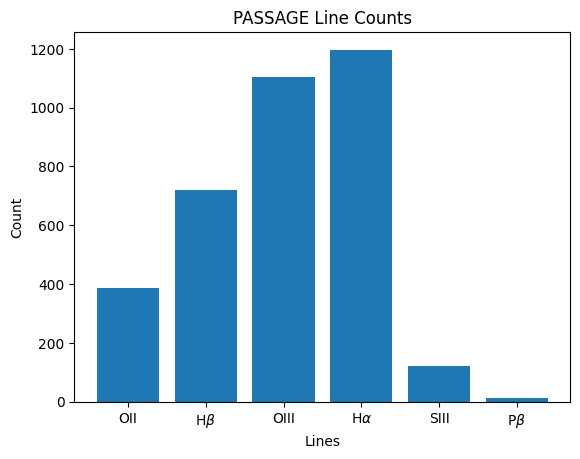

In [80]:
categories=['OII',r'H$\beta$','OIII',r'H$\alpha$','SIII',r'P$\beta$']
ha=0
hb=0
o3=0
o2=0
pg=0
pb=0
s3=0

o2only=0
o3only=0
haonly=0
s3only=0
pbonly=0
o3o2hb=0
o3hb=0
hao3=0
hahbo3=0
has3=0
hapb=0
s3pb=0
hbo2=0
o2o3=0
hahb=0
hahbo3o2=0
#hahbo3o2=0
badcount=0
df['catagory'] = 0

for i in range(len(df)):
    if df['snr_Ha'][i]>2:
        ha+=1
    if df['snr_Hb'][i]>2:
        hb+=1
    if df['snr_OIII'][i]>2:
        o3+=1
    if df['snr_OII'][i]>2:
        o2+=1
    if df['snr_Pb'][i]>2:
        pb+=1
    if df['snr_SIII'][i]>2:
        s3+=1

    
    if (df['snr_SIII'][i]>2) and (df['snr_Pb'][i]>2) and (df['snr_Ha'][i]<=2) and (df['snr_OII'][i]<=2) and (df['snr_OIII'][i]<=2) and (df['snr_Hb'][i]<=2):#Want to only see s3 and pb
        s3pb+=1
        df.at[i, 'catagory'] = r'SIII & Pa$\beta$'
    elif (df['snr_Ha'][i]>2) and (df['snr_OIII'][i]>2) and (df['snr_SIII'][i]<=2) and (df['snr_OII'][i]>2) and (df['snr_Hb'][i]>2) and (df['snr_Pb'][i]<=2):#Only see ha and hb
        hahbo3o2+=1
        df.at[i, 'catagory'] = r'H$\alpha$ & H$\beta$ & OIII & OII'
    elif (df['snr_SIII'][i]>2) and (df['snr_Ha'][i]>2) and (df['snr_Pb'][i]<=2) and (df['snr_OII'][i]<=2) and (df['snr_OIII'][i]<=2) and (df['snr_Hb'][i]<=2):#only see ha and s3
        has3+=1
        df.at[i, 'catagory'] = r'H$\alpha$ & SIII'
    elif (df['snr_Pb'][i]>2) and (df['snr_Ha'][i]>2) and (df['snr_SIII'][i]<=2) and (df['snr_OII'][i]<=2) and (df['snr_OIII'][i]<=2) and (df['snr_Hb'][i]<=2):#only see ha and pb
        hapb+=1
        df.at[i, 'catagory'] = r'H$\alpha$ & Pa$\beta$'
    elif (df['snr_OIII'][i]>2) and (df['snr_Ha'][i]>2) and (df['snr_Hb'][i]<=2) and (df['snr_OII'][i]<=2) and (df['snr_Pb'][i]<=2):#only see ha and o3
        hao3+=1
        df.at[i, 'catagory'] = r'H$\alpha$ & OIII'
    elif (df['snr_OIII'][i]>2) and (df['snr_Hb'][i]>2) and (df['snr_Ha'][i]<=2) and (df['snr_OII'][i]<=2) and (df['snr_Pb'][i]<=2):#only see hb and o3
        o3hb+=1
        df.at[i, 'catagory'] = r'OIII & H$\beta$'
    elif (df['snr_OIII'][i]>2) and (df['snr_Hb'][i]>2) and (df['snr_Ha'][i]>2) and (df['snr_OII'][i]<=2) and (df['snr_Pb'][i]<=2):#only see o3, ha, and hb
        hahbo3+=1
        df.at[i, 'catagory'] = r'H$\alpha$ & OIII & H$\beta$'
    elif (df['snr_OIII'][i]>2) and (df['snr_Hb'][i]>2) and (df['snr_OII'][i]>2)+(df['snr_Ha'][i]<=2):#only see o3, o2, and hb
        o3o2hb+=1
        df.at[i, 'catagory'] = r'OIII & H$\beta$ & OII'
    elif (df['snr_Ha'][i]>2) and (df['snr_OIII'][i]<=2) and (df['snr_SIII'][i]<=2) and (df['snr_Pb'][i]<=2) and (df['snr_Hb'][i]<=2) and (df['snr_OII'][i]<=2):#Only see ha with no o3,s3,hb,pb
        haonly+=1
        df.at[i, 'catagory'] = r'H$\alpha$ only'
    elif (df['snr_Ha'][i]<=2) and (df['snr_OIII'][i]>2) and (df['snr_SIII'][i]<=2) and (df['snr_OII'][i]<=2) and (df['snr_Hb'][i]<=2) and (df['snr_Pb'][i]<=2):#Only see o3 with no ha,s3,hb,o2
        o3only+=1
        df.at[i, 'catagory'] = r'OIII only'
    elif (df['snr_Ha'][i]<=2) and (df['snr_OIII'][i]<=2) and (df['snr_SIII'][i]<=2) and (df['snr_OII'][i]>2) and (df['snr_Hb'][i]<=2) and (df['snr_Pb'][i]<=2):#Only see o2
        o2only+=1
        df.at[i, 'catagory'] = r'OII only'
    elif (df['snr_Ha'][i]<=2) and (df['snr_OIII'][i]<=2) and (df['snr_SIII'][i]>2) and (df['snr_OII'][i]<=2) and (df['snr_Hb'][i]<=2) and (df['snr_Pb'][i]<=2):#Only see s3
        s3only+=1
        df.at[i, 'catagory'] = r'SIII only'
    elif (df['snr_Ha'][i]<=2) and (df['snr_OIII'][i]<=2) and (df['snr_SIII'][i]<=2) and (df['snr_OII'][i]<=2) and (df['snr_Hb'][i]<=2) and (df['snr_Pb'][i]>2):#Only see pb
        pbonly+=1
        df.at[i, 'catagory'] = r'Pa$\beta$ only'
    elif (df['snr_Ha'][i]<=2) and (df['snr_OIII'][i]<=2) and (df['snr_SIII'][i]<=2) and (df['snr_OII'][i]>2) and (df['snr_Hb'][i]>2) and (df['snr_Pb'][i]<=2):#Only see hb and o2
        hbo2+=1
        df.at[i, 'catagory'] = r'OII & H$\beta$'
    elif (df['snr_Ha'][i]<=2) and (df['snr_OIII'][i]>2) and (df['snr_SIII'][i]<=2) and (df['snr_OII'][i]>2) and (df['snr_Hb'][i]<=2) and (df['snr_Pb'][i]<=2):#Only see hb and o2
        o2o3+=1
        df.at[i, 'catagory'] = r'OIII & OII'
    elif (df['snr_Ha'][i]>2) and (df['snr_OIII'][i]<=2) and (df['snr_SIII'][i]<=2) and (df['snr_OII'][i]<=2) and (df['snr_Hb'][i]>2) and (df['snr_Pb'][i]<=2):#Only see ha and hb
        hahb+=1
        df.at[i, 'catagory'] = r'H$\alpha$ & H$\beta$'
    elif (df['snr_Ha'][i]>2) and (df['snr_OIII'][i]>2) and (df['snr_SIII'][i]<=2) and (df['snr_OII'][i]>2) and (df['snr_Hb'][i]<2) and (df['snr_Pb'][i]<=2):#Only see ha and hb
        hahb+=1
        df.at[i, 'catagory'] = r'H$\alpha$ & OIII & OII'
    elif (df['snr_Ha'][i]>2) and (df['snr_OIII'][i]<2) and (df['snr_SIII'][i]<=2) and (df['snr_OII'][i]>2) and (df['snr_Hb'][i]>2) and (df['snr_Pb'][i]<=2):#Only see ha and hb
        hahb+=1
        df.at[i, 'catagory'] = r'H$\alpha$ & H$\beta$ & OII'
    else:
        df.at[i, 'catagory'] = np.nan
        print('lost', df.iloc[i])
        badcount+=1
values=[o2,hb,o3,ha,s3,pb]
print(values)
print(badcount)
plt.bar(categories, values)
plt.xlabel('Lines')
plt.ylabel('Count')
plt.title('PASSAGE Line Counts')


In [81]:
hahbo3o2

84

/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_23088/3974137792.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab20b_cmap = cm.get_cmap('tab20b')


[0 0 0 0 0 0 0 0 0 0 9 3 4 2 0 2 4 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 10 25 20 14 14  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0 16 50 49 37 16  4  8 10  3  1  2  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  0  0 54 76 79 24  0  4 12 15  8  2  1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 7 6 1 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[ 0  0  0  0  0  0 15 22 13  0  2  2  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[ 0  0  0  0  0  5 34 87 77 21 30 27 14  9  0 62 38 42 44 18  4  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 

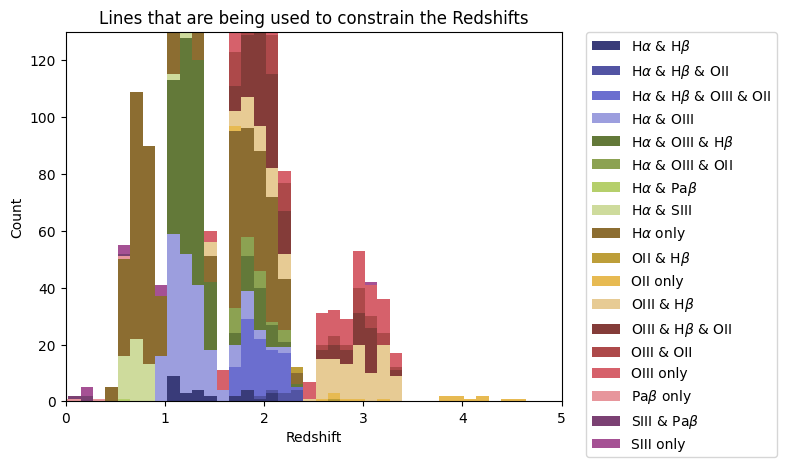

In [82]:
nbins=40
bins = np.linspace(np.min(df['redshift']),np.max(df['redshift']),nbins)#np.arange(0,4,20)
grouped = df.groupby('catagory')
bottom = np.zeros(len(bins) - 1)
cc=0


import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Get the tab20b colormap
tab20b_cmap = cm.get_cmap('tab20b')

# Get the first color from tab20b (index 0)
#color_0 = tab20b_cmap(0)
for label, group in grouped:
    #if label=='bad':
    #    continue
    #print(label,group)
    #plt.hist(group['redshift'])
    #plt.show()
    counts, _ = np.histogram(group['redshift'], bins=bins)
    print(counts)
    plt.bar(bins[:-1], counts, color=tab20b_cmap(cc),width=5/nbins, bottom=bottom, label=label, alpha=1)#, color=colors[cc]
    bottom += counts  # update bottom for stacking
    cc+=1

plt.xlabel('Redshift')
plt.ylabel('Count')
plt.ylim(0,130)
plt.xlim(0,5)
plt.title('Lines that are being used to constrain the Redshifts')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend(ncol=2)
plt.show()


In [83]:
fdf=df[(df['emline_flag'] >= 1) & (df['emline_flag'] <= 4)]
fdf

,objid,redshift,redshift_error,ra_obj,dec_obj,snr_tot_others,snr_OII,snr_OIII,snr_Hb,snr_Ha,snr_Pb,snr_SIII,emline_flag,Par,grism,catagory
0,8.0,1.96988,0.00000,150.142174,2.476397,7.33,4.067612,8.238994,1.587156,-1.000000,-1.0,-1.0,2.0,Par024,2 Filters,OIII & OII
1,9.0,1.97364,0.00025,150.142183,2.47654,41.54,24.607843,52.884615,11.690141,-1.000000,-1.0,-1.0,1.0,Par024,2 Filters,OIII & H$\beta$ & OII
2,31.0,0.81933,0.00000,150.143154,2.478128,8.65,-1.000000,-1.000000,-1.000000,8.640646,-1.0,-1.0,4.0,Par024,2 Filters,H$\alpha$ only
3,91.0,2.11985,0.00115,150.144131,2.480157,10.53,3.012912,11.250000,1.484127,-1.000000,-1.0,-1.0,2.0,Par024,2 Filters,OIII & OII
4,143.0,2.13190,0.00000,150.133466,2.481628,9.00,8.907035,9.005848,0.035373,-1.000000,-1.0,-1.0,1.0,Par024,2 Filters,OIII & OII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,2275.0,1.72630,0.00141,149.689222,2.069251,17.78,-1.000000,-1.000000,-1.000000,21.260997,-1.0,-1.0,4.0,Par049,1 Filter,H$\alpha$ only
1993,2365.0,2.67948,0.00206,149.708403,2.070837,6.09,-1.000000,7.247619,3.213920,-1.000000,-1.0,-1.0,2.0,Par049,1 Filter,OIII & H$\beta$
1994,2529.0,2.87519,0.00000,149.691295,2.073345,4.45,-1.000000,5.026178,3.618785,-1.000000,-1.0,-1.0,2.0,Par049,1 Filter,OIII & H$\beta$
1995,2608.0,1.83314,0.00000,149.703272,2.07377,0.00,-1.000000,-1.000000,-1.000000,2.987179,-1.0,-1.0,4.0,Par049,1 Filter,H$\alpha$ only


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_52959/461137110.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab20b_cmap = cm.get_cmap('Set1')


KeyError: 'catagory'

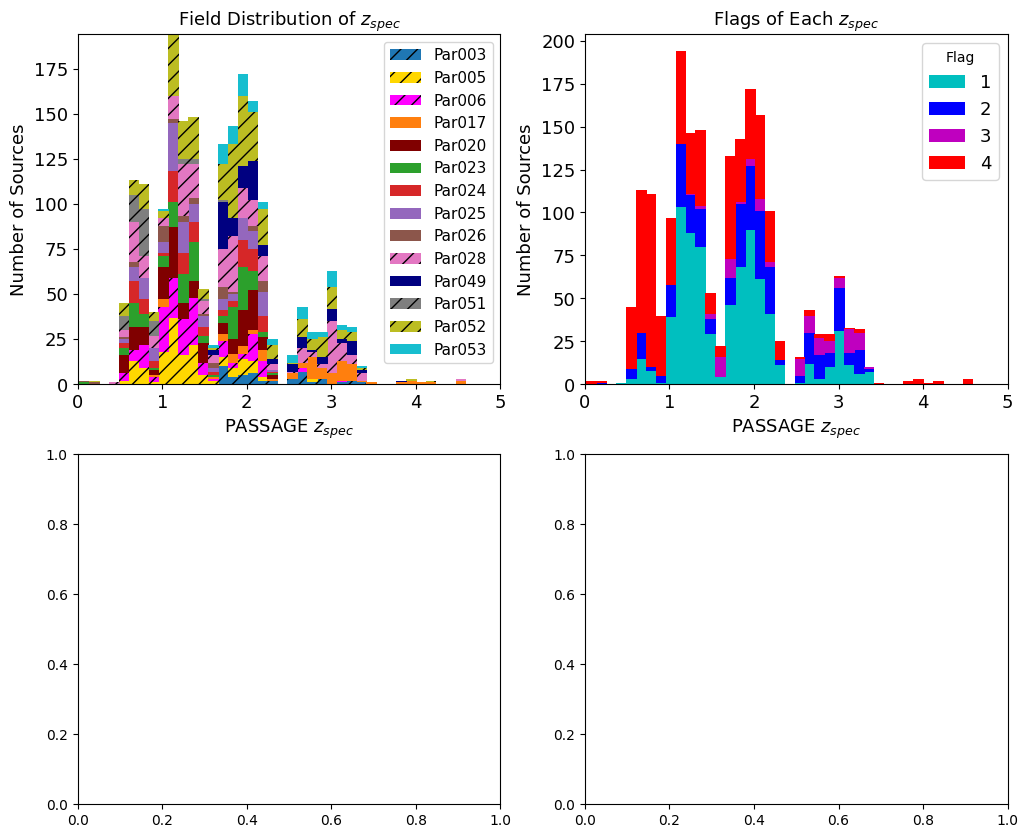

In [16]:
fig, ((ax1, ax2), (ax3,ax4)) = plt.subplots(2, 2, figsize=(12,10))
colors2=['tab:blue','gold','magenta','tab:orange','maroon','tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink','navy','tab:gray','tab:olive', 'tab:cyan']
#colors2=['tab:blue','gold','magenta','tab:orange','maroon','tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink','lime','navy','tab:gray','tab:olive', 'tab:cyan']

hatch_groups = ['Par003','Par005','Par006','Par028','Par051','Par052']
nbins=40
ccv=0

fdf=df[(df['emline_flag'] >= 1) & (df['emline_flag'] <= 4)]
bins = np.linspace(np.min(fdf['redshift']),np.max(fdf['redshift']),nbins)#np.arange(0,4,20)
grouped = fdf.groupby('Par')
grouped
#print(grouped)
bottom = np.zeros(len(bins) - 1)
for label, group in grouped:
    #print(label,group)
    #plt.hist(group['redshift'])
    #plt.show()
    counts, _ = np.histogram(group['redshift'], bins=bins)
    #print(counts)
    bars=ax1.bar(bins[:-1], counts,color=colors2[ccv], width=5/nbins, bottom=bottom, label=label, alpha=1)
    bottom += counts  # update bottom for stacking
    ccv+=1

    if label in hatch_groups:
        for bar in bars:
            bar.set_hatch('//')

ax1.set_xlabel('PASSAGE $z_{spec}$', fontsize=13)
ax1.set_ylabel('Number of Sources',fontsize=13)
#ax1.set_xticks(fontsize=14)
ax1.tick_params(axis='both', labelsize=13)
ax1.set_title('Field Distribution of $z_{spec}$', fontsize=13)
#ax1.set_yticks(fontsize=14)
ax1.set_xlim(0,5)
#plt.title('Histogram of Redshifts')
ax1.legend(fontsize=11)


import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Get the tab20b colormap
tab20b_cmap = cm.get_cmap('Set1')
colors3=['c','b','m','r']
nbins=40
cc=0
fdf=df[(df['emline_flag'] >= 1) & (df['emline_flag'] <= 4)]
bins = np.linspace(np.min(fdf['redshift']),np.max(fdf['redshift']),nbins)#np.arange(0,4,20)
grouped = fdf.groupby('emline_flag')
#print(grouped)
bottom = np.zeros(len(bins) - 1)
for label, group in grouped:
    #print(label,group)
    #plt.hist(group['redshift'])
    #plt.show()
    counts, _ = np.histogram(group['redshift'], bins=bins)
    #print(counts)
    ax2.bar(bins[:-1], counts, color=colors3[cc],width=5/nbins, bottom=bottom, label=label, alpha=1)#color=tab20b_cmap(cc)
    bottom += counts  # update bottom for stacking
    cc+=1

ax2.set_xlabel('PASSAGE $z_{spec}$', fontsize=13)
ax2.set_ylabel('Number of Sources',fontsize=13)
ax2.tick_params(axis='both', labelsize=13)
ax2.set_title('Flags of Each $z_{spec}$', fontsize=13)
#ax2.xticks(fontsize=14)
#plt.yticks(fontsize=14)
ax2.set_xlim(0,5)
#plt.title('Histogram of Redshifts')
ax2.legend(labels=['1','2','3','4'],title='Flag',fontsize=13)

nbins=40
fdf=df[(df['emline_flag'] >= 1) & (df['emline_flag'] <= 4)]
bins = np.linspace(np.min(fdf['redshift']),np.max(fdf['redshift']),nbins)#np.arange(0,4,20)
grouped = fdf.groupby('catagory')
bottom = np.zeros(len(bins) - 1)
cc=0


import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Get the tab20b colormap
tab20b_cmap = cm.get_cmap('tab20b')

# Get the first color from tab20b (index 0)
#color_0 = tab20b_cmap(0)
for label, group in grouped:
    #if label=='bad':
    #    continue
    #print(label,group)
    #plt.hist(group['redshift'])
    #plt.show()
    counts, _ = np.histogram(group['redshift'], bins=bins)
    #print(counts)
    ax4.bar(bins[:-1], counts, color=tab20b_cmap(cc),width=5/nbins, bottom=bottom, label=label, alpha=1)#, color=colors[cc]
    bottom += counts  # update bottom for stacking
    cc+=1

ax4.set_xlabel('PASSAGE $z_{spec}$', fontsize=13)
ax4.set_ylabel('Number of Sources',fontsize=13)
ax4.tick_params(axis='both', labelsize=13)
ax4.set_ylim(0,130)
ax4.set_xlim(0,5)
ax4.set_title('Lines Used to Constrain $z_{spec}$', fontsize=13)
ax4.legend(bbox_to_anchor=(1.05, 1.2), loc='upper left', borderaxespad=0.)
#plt.legend(ncol=2)





nbins=40
fdf=df[(df['emline_flag'] >= 1) & (df['emline_flag'] <= 4)]
bins = np.linspace(np.min(fdf['redshift']),np.max(fdf['redshift']),nbins)#np.arange(0,4,20)
grouped = fdf.groupby('grism')
bottom = np.zeros(len(bins) - 1)
cc=0
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Get the tab20b colormap
tab20b_cmap = cm.get_cmap('Dark2')

# Get the first color from tab20b (index 0)
#color_0 = tab20b_cmap(0)
for label, group in grouped:
    #if label=='bad':
    #    continue
    #print(label,group)
    #plt.hist(group['redshift'])
    #plt.show()
    counts, _ = np.histogram(group['redshift'], bins=bins)
    #print(counts)
    bars=ax3.bar(bins[:-1], counts, color=tab20b_cmap(cc),width=5/nbins, bottom=bottom, label=label, alpha=1)#, color=colors[cc]
    bottom += counts  # update bottom for stacking
    cc+=1

    

ax3.set_xlabel('PASSAGE $z_{spec}$', fontsize=13)
ax3.set_ylabel('Number of Sources',fontsize=13)
ax3.tick_params(axis='both', labelsize=13)
ax3.set_ylim(0,140)
ax3.set_xlim(0,5)
ax3.set_title('Number of Filters Available to Constrain $z_{spec}$', fontsize=13)
ax3.legend(fontsize=12)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#plt.legend(ncol=2)

ax1.set_ylim(0,170)
ax2.set_ylim(0,170)
ax3.set_ylim(0,170)
ax4.set_ylim(0,170)

plt.tight_layout()
plt.show()





In [98]:

np.unique(list(np.array(fdf['catagory'])))

array(['H$\\alpha$ & H$\\beta$', 'H$\\alpha$ & H$\\beta$ & OII',
       'H$\\alpha$ & H$\\beta$ & OIII & OII', 'H$\\alpha$ & OIII',
       'H$\\alpha$ & OIII & H$\\beta$', 'H$\\alpha$ & OIII & OII',
       'H$\\alpha$ & Pa$\\beta$', 'H$\\alpha$ & SIII', 'H$\\alpha$ only',
       'OII & H$\\beta$', 'OII only', 'OIII & H$\\beta$',
       'OIII & H$\\beta$ & OII', 'OIII & OII', 'OIII only',
       'Pa$\\beta$ only', 'SIII & Pa$\\beta$', 'SIII only', 'nan'],
      dtype='<U33')

In [102]:
df

,objid,redshift,redshift_error,ra_obj,dec_obj,snr_tot_others,snr_OII,snr_OIII,snr_Hb,snr_Ha,snr_Pb,snr_SIII,emline_flag,Par,grism,catagory
0,8.0,1.96988,0.00000,150.142174,2.476397,7.33,4.067612,8.238994,1.587156,-1.000000,-1.0,-1.0,2.0,Par024,2 Filters,OIII & OII
1,9.0,1.97364,0.00025,150.142183,2.47654,41.54,24.607843,52.884615,11.690141,-1.000000,-1.0,-1.0,1.0,Par024,2 Filters,OIII & H$\beta$ & OII
2,31.0,0.81933,0.00000,150.143154,2.478128,8.65,-1.000000,-1.000000,-1.000000,8.640646,-1.0,-1.0,4.0,Par024,2 Filters,H$\alpha$ only
3,91.0,2.11985,0.00115,150.144131,2.480157,10.53,3.012912,11.250000,1.484127,-1.000000,-1.0,-1.0,2.0,Par024,2 Filters,OIII & OII
4,143.0,2.13190,0.00000,150.133466,2.481628,9.00,8.907035,9.005848,0.035373,-1.000000,-1.0,-1.0,1.0,Par024,2 Filters,OIII & OII
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1993,2365.0,2.67948,0.00206,149.708403,2.070837,6.09,-1.000000,7.247619,3.213920,-1.000000,-1.0,-1.0,2.0,Par049,1 Filter,OIII & H$\beta$
1994,2529.0,2.87519,0.00000,149.691295,2.073345,4.45,-1.000000,5.026178,3.618785,-1.000000,-1.0,-1.0,2.0,Par049,1 Filter,OIII & H$\beta$
1995,2608.0,1.83314,0.00000,149.703272,2.07377,0.00,-1.000000,-1.000000,-1.000000,2.987179,-1.0,-1.0,4.0,Par049,1 Filter,H$\alpha$ only
1996,2703.0,1.72349,0.00315,149.695108,2.076333,8.57,-1.000000,-1.000000,-1.000000,8.557047,-1.0,-1.0,4.0,Par049,1 Filter,H$\alpha$ only


Text(2.0, 155.5, '0.25<z<1.10')

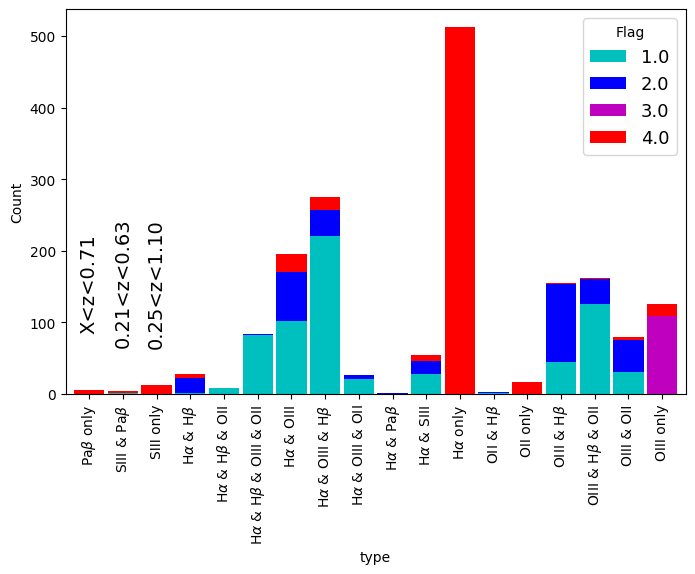

In [130]:
fdf=df[(df['emline_flag'] >= 1) & (df['emline_flag'] <= 4)]
fdf=fdf[(np.isnan(fdf['emline_flag']) == False)]

counts = fdf.pivot_table(
    index="catagory",
    columns="emline_flag",
    aggfunc="size",
    fill_value=0
)

desired_order = ['Pa$\\beta$ only', 'SIII & Pa$\\beta$','SIII only','H$\\alpha$ & H$\\beta$', 'H$\\alpha$ & H$\\beta$ & OII',
       'H$\\alpha$ & H$\\beta$ & OIII & OII', 'H$\\alpha$ & OIII',
       'H$\\alpha$ & OIII & H$\\beta$', 'H$\\alpha$ & OIII & OII',
       'H$\\alpha$ & Pa$\\beta$', 'H$\\alpha$ & SIII', 'H$\\alpha$ only',
       'OII & H$\\beta$', 'OII only', 'OIII & H$\\beta$',
       'OIII & H$\\beta$ & OII', 'OIII & OII', 'OIII only',
       ]

# Reindex the pivot table
counts = counts.reindex(desired_order)

colors3=['c','b','m','r']
counts.plot(
    kind="bar",
    width=0.9,
    stacked=True,
    color=colors3,
    #colormap="tab20b",   # or any other colormap
    figsize=(8, 5)
)
#Divide the bar by flag color
#label the redshifts
#label each bar
plt.xlabel("type")
plt.ylabel("Count")
plt.legend(title="Flag",fontsize=13)

plt.text(0., 155.5, 'X<z<0.71', rotation=90, ha='center', va='center', fontsize=14)
plt.text(1., 155.5, '0.21<z<0.63', rotation=90, ha='center', va='center', fontsize=14)
plt.text(2., 155.5, '0.25<z<1.10', rotation=90, ha='center', va='center', fontsize=14)



In [125]:
for cat in desired_order:
    check=fdf[(fdf['catagory'] == cat)]
    print(cat)
    print(min(check['redshift']))
    print(max(check['redshift']))
    print()

SIII only
0.24625
1.09322

H$\alpha$ & H$\beta$
1.11008
2.2008

H$\alpha$ & H$\beta$ & OII
2.07076
2.39236

H$\alpha$ & H$\beta$ & OIII & OII
1.75622
2.35347

H$\alpha$ & OIII
1.03308
2.30329

H$\alpha$ & OIII & H$\beta$
1.08873
2.33231

H$\alpha$ & OIII & OII
1.72653
2.27076

H$\alpha$ & Pa$\beta$
0.69153
0.69153

H$\alpha$ & SIII
0.60832
1.27786

H$\alpha$ only
0.57421
2.34571

OII & H$\beta$
2.33416
2.82403

OII only
1.81744
4.58525

OIII & H$\beta$
1.20706
3.44589

OIII & H$\beta$ & OII
1.76202
3.42137

OIII & OII
1.75555
3.37404

OIII only
1.34027
3.36305

Pa$\beta$ only
-0.15916
0.70843

SIII & Pa$\beta$
0.2114
0.62974



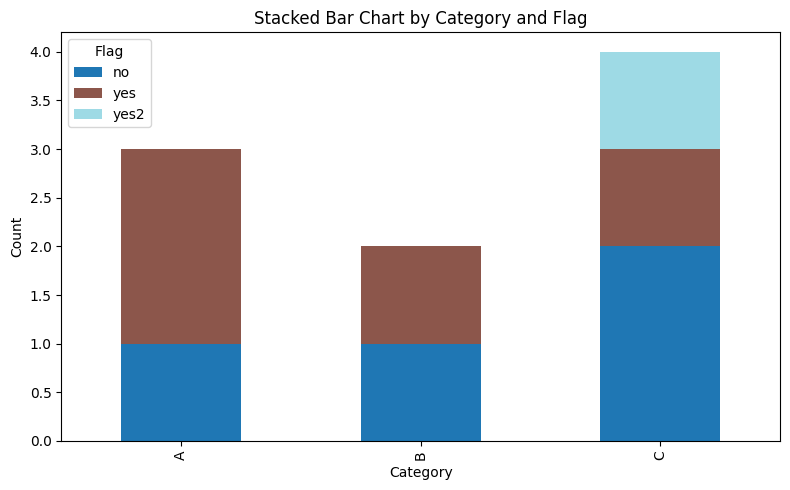

In [72]:
import pandas as pd

df = pd.DataFrame({
    "category": ["A", "A", "A", "B", "B", "C", "C", "C", "C"],
    "flag": ["yes", "no", "yes", "no", "yes", "no", "no", "yes", "yes2"]
})
counts = df.pivot_table(
    index="category",
    columns="flag",
    aggfunc="size",
    fill_value=0
)
import matplotlib.pyplot as plt

counts.plot(
    kind="bar",
    stacked=True,
    colormap="tab20",   # or any other colormap
    figsize=(8, 5)
)

plt.title("Stacked Bar Chart by Category and Flag")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Flag")
plt.tight_layout()
plt.show()

In [5]:
df

NameError: name 'df' is not defined

In [104]:
m24=fits.open('Par024_lines_bagpipes_cat_emlines_fit.fits')
m24[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2822 / length of dimension 1                          
NAXIS2  =                  126 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  358 / number of table fields                         
TTYPE1  = 'passage_id'                                                          
TFORM1  = 'K       '                                                            
TTYPE2  = 'ra_niriss'                                                           
TFORM2  = 'D       '                                                            
TUNIT2  = 'deg     '        

In [106]:
m24[1].data['objid   ']

chararray(['8', '9', '31', '91', '100', '143', '183', '184', '233', '332',
           '340', '349', '433', '434', '444', '449', '526', '557', '640',
           '658', '706', '731', '736', '750', '762', '792', '814', '838',
           '847', '880', '905', '988', '1072', '1076', '1161', '1214',
           '1230', '1249', '1259', '1334', '1353', '1380', '1470', '1522',
           '1523', '1526', '1532', '1553', '1603', '1633', '1699', '1787',
           '1810', '1849', '1870', '1878', '1880', '1897', '1921', '1932',
           '1936', '1989', '2007', '2050', '2108', '2108', '2165', '2194',
           '2229', '2234', '2262', '2278', '2419', '2422', '2530', '2574',
           '2600', '2649', '2651', '2662', '2696', '2699', '2708', '2738',
           '2764', '2821', '2826', '2856', '2879', '2882', '2928', '2940',
           '2967', '2971', '2972', '3011', '3026', '3096', '3147', '3166',
           '3220', '3242', '3271', '3287', '3333', '3345', '3363', '3370',
           '3439', '3448', '348

(array([4., 3., 3., 2., 0., 1., 0., 1., 0., 3.]),
 array([0.02501107, 0.10474879, 0.18448651, 0.26422423, 0.34396195,
        0.42369968, 0.5034374 , 0.58317512, 0.66291285, 0.74265057,
        0.82238829]),
 <BarContainer object of 10 artists>)

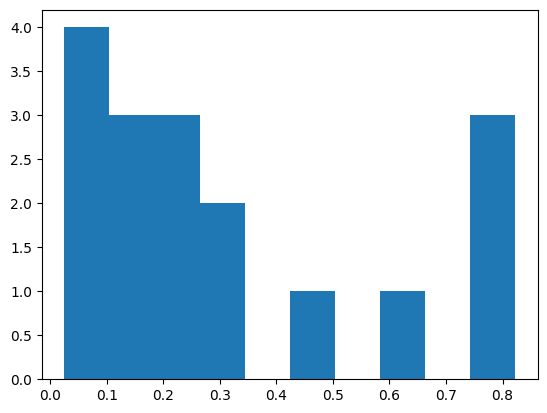

In [134]:
plt.hist(m24[1].data['jwst-nircam-f150w_sci'])

/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_3921/3490338466.py:13: RuntimeWarning: invalid value encountered in log10
  nirissf150flux=np.log10(np.array(m24[1].data['jwst-nircam-f150w_sci']))


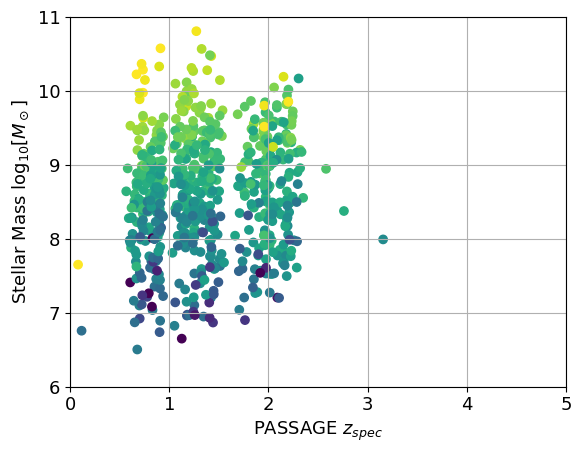

In [136]:
filepaths=['Par023_lines_bagpipes_cat_emlines_fit.fits','Par024_lines_bagpipes_cat_emlines_fit.fits','Par025_lines_bagpipes_cat_emlines_fit.fits','Par026_lines_bagpipes_cat_emlines_fit.fits','Par051_lines_bagpipes_cat_emlines_fit.fits','Par053_lines_bagpipes_cat_emlines_fit.fits']
colors=['tab:green','tab:red','tab:purple','tab:brown','tab:gray','tab:cyan']
reds=[]
masses=[]
fluxes=[]
for hh in range(len(filepaths)):
    m24=fits.open(filepaths[hh])
    z24=m24[1].data['redshift']
    z24err=m24[1].data['redshift_error']
    zmass=m24[1].data['stellar_mass_50']
    zmasslow=m24[1].data['stellar_mass_16']
    zmassup=m24[1].data['stellar_mass_84']
    nirissf150flux=np.log10(np.array(m24[1].data['jwst-nircam-f150w_sci']))
    reds.append(z24)
    masses.append(zmass)
    fluxes.append(nirissf150flux)
    plt.scatter(z24,zmass,c=nirissf150flux)
    #plt.plot(z24,zmass,".",color=colors[hh],alpha=0.3)
    #plt.plot([z24,z24],[zmasslow,zmassup],color=colors[hh],alpha=0.3)
    #plt.plot([z24+z24err,z24-z24err],[zmass,zmass],color=colors[hh],alpha=0.3)
plt.xlim(0,5)
plt.ylim(6,11)
plt.xlabel('PASSAGE $z_{spec}$', fontsize=13)
plt.ylabel(r'Stellar Mass log$_{10}$[$M_\odot$]',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.grid()

In [4]:
check=fits.open('Par023_lines_bagpipes_cat_emlines_fit.fits')
check.info()
check[1].header

Filename: Par023_lines_bagpipes_cat_emlines_fit.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    806   155R x 358C   [K, D, D, 21A, D, D, D, D, K, K, D, D, E, E, E, E, E, E, D, D, E, E, E, E, E, E, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, L, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2822 / length of dimension 1                          
NAXIS2  =                  155 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                  358 / number of table fields                         
TTYPE1  = 'passage_id'                                                          
TFORM1  = 'K       '                                                            
TTYPE2  = 'ra_niriss'                                                           
TFORM2  = 'D       '                                                            
TUNIT2  = 'deg     '        

In [143]:
len(fluxes)

6

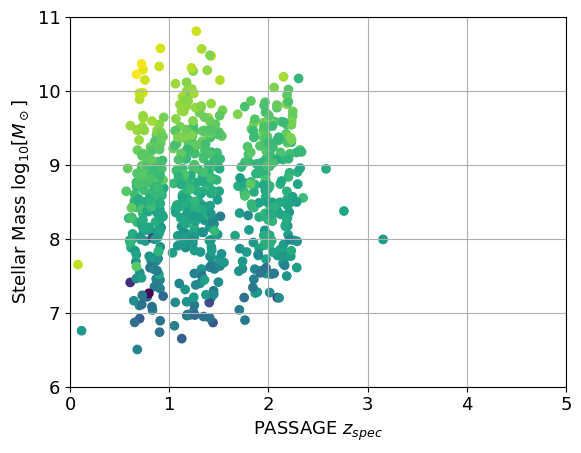

In [146]:
import itertools
#reds=list(itertools.chain.from_iterable(reds))
#masses=list(itertools.chain.from_iterable(masses))
#fluxes=list(itertools.chain.from_iterable(fluxes))
plt.scatter(reds,masses,c=fluxes)
plt.xlim(0,5)
plt.ylim(6,11)
plt.xlabel('PASSAGE $z_{spec}$', fontsize=13)
plt.ylabel(r'PASSAGE Stellar Mass log$_{10}$[$M_\odot$]',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.grid()

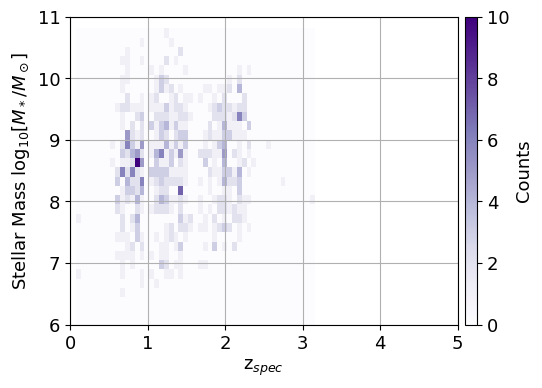

In [238]:
import matplotlib.pyplot as plt
import numpy as np

# --- Sample data ---
np.random.seed(0)
x = reds#np.random.randn(1000)
y = masses#np.random.randn(1000) * 2 + 1

# --- Create figure and subplots ---
'''
fig, (ax_main, ax_bottom) = plt.subplots(
    2, 1,
    gridspec_kw={'height_ratios': [4, 1], 'hspace': 0},
    sharex=True,
    figsize=(6, 8)
)
'''

fig, ax_main = plt.subplots(
    1, 1,
    figsize=(5, 4)
)
# --- Compute shared bin edges for consistency ---
bins = np.linspace(np.min(x), np.max(x), 50)

# --- Main 2D histogram ---
h = ax_main.hist2d(x, y, bins=[bins, 50], cmap='Purples')
hp, xedges, yedges = np.histogram2d(x, y, bins=[bins, 50])
x_bin_indices = np.digitize(x, xedges)
# --- Add colorbar manually, without resizing the main plot ---
# Create a new inset axis for the colorbar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cax = inset_axes(ax_main, width="3%", height="100%", loc="lower left",
                 bbox_to_anchor=(1.02, 0., 1, 1),
                 bbox_transform=ax_main.transAxes, borderpad=0)
cbar=fig.colorbar(h[3], cax=cax, label='Counts')
cbar.ax.tick_params(labelsize=13)
cbar.set_label('Counts', fontsize=13)

ax_main.set_xlabel(r'z$_{spec}$',fontsize=13)
#ax_main.set_title('2D Histogram with Shared X-axis and Fixed Colorbar')

# --- Bottom subplot (aligned perfectly) ---
#ax_bottom.hist(x, bins=bins, color='gray')
ax_main.set_ylabel(r'Stellar Mass log$_{10}$[$M_*/M_\odot$]',fontsize=13)
#ax_bottom.set_ylabel('Throughout',fontsize=13)

ax_main.tick_params(axis='x', labelsize=13)
#ax_bottom.set_yticks([])
ax_main.tick_params(axis='y', labelsize=13)
#ax_bottom.tick_params(axis='y', labelsize=13)

# --- Align the axes exactly ---
ax_main.set_xlim(ax_main.get_xlim())
#ax_main.tick_params(labelbottom=False)
ax_main.grid()
ax_main.set_ylim(6,11)
ax_main.set_xlim(0,5)
plt.show()


In [228]:
x_values_per_bin = {}
y_values_per_bin = {}

for i in range(1, len(xedges)):  # Iterate through bins (excluding the last edge)
        # Find indices of data points belonging to the current x-bin
        mask = (x_bin_indices == i)
        #print(mask)
        # Retrieve x and y values for the current bin
        x_values_in_bin = np.array(x)[mask]
        y_values_in_bin = np.array(y)[mask]

        # Store the values, using a descriptive key for the bin range
        bin_label = f"[{xedges[i-1]:.2f}, {xedges[i]:.2f})"
        x_values_per_bin[bin_label] = x_values_in_bin
        y_values_per_bin[bin_label] = y_values_in_bin

    # Example: print values for the first x-bin
first_bin_label = list(x_values_per_bin.keys())[12]
print(f"X values in bin {first_bin_label}: {x_values_per_bin[first_bin_label]}")
print(f"Y values in bin {first_bin_label}: {y_values_per_bin[first_bin_label]}")

X values in bin [0.83, 0.90): [0.88281  0.87676  0.89069  0.85165  0.88382  0.87431  0.89151  0.87117
 0.87556  0.89363  0.89225  0.89225  0.85021  0.88131  0.86757  0.85543
 0.87676  0.8775   0.87051  0.85751  0.86837  0.88783  0.889435 0.87971
 0.83954  0.85179  0.85193  0.89628  0.85197  0.83661  0.88812  0.88483
 0.84759  0.87989  0.88848  0.89038  0.86349  0.85543  0.86396  0.87341
 0.88517  0.87744 ]
Y values in bin [0.83, 0.90): [7.35564244 8.44730242 8.38790839 7.35180952 8.01712337 8.5624615
 8.11816297 9.40087515 8.3551093  7.82579001 8.68899883 8.68899883
 7.58309908 8.59028135 7.6959296  9.31575656 8.81826576 9.46380742
 8.57646626 8.77887816 7.4558701  9.04118686 8.8017061  8.83345029
 7.6878392  7.99291602 8.69966123 7.51816161 8.82843275 7.74449091
 7.731115   8.09295139 8.93031643 8.61772437 8.08795866 7.82813545
 8.22857441 8.59873519 8.42388709 8.67488179 8.69841677 7.56680375]


In [ ]:
#plt.plot('jwst-niriss-f150w_sci')

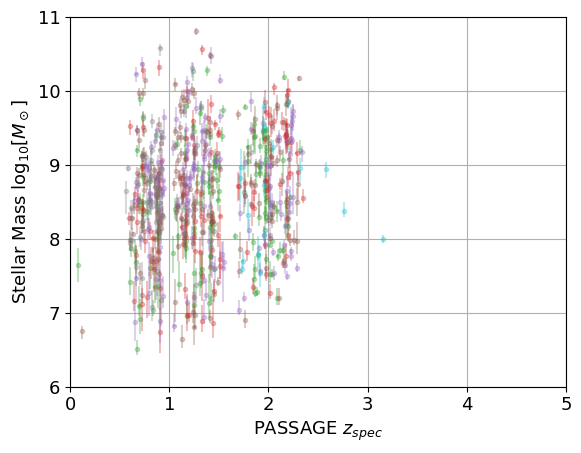

In [131]:
filepaths=['Par023_lines_bagpipes_cat_emlines_fit.fits','Par024_lines_bagpipes_cat_emlines_fit.fits','Par025_lines_bagpipes_cat_emlines_fit.fits','Par026_lines_bagpipes_cat_emlines_fit.fits','Par051_lines_bagpipes_cat_emlines_fit.fits','Par053_lines_bagpipes_cat_emlines_fit.fits']
colors=['tab:green','tab:red','tab:purple','tab:brown','tab:gray','tab:cyan']
for hh in range(len(filepaths)):
    m24=fits.open(filepaths[hh])
    z24=m24[1].data['redshift']
    z24err=m24[1].data['redshift_error']
    zmass=m24[1].data['stellar_mass_50']
    zmasslow=m24[1].data['stellar_mass_16']
    zmassup=m24[1].data['stellar_mass_84']
    plt.plot(z24,zmass,".",color=colors[hh],alpha=0.3)
    plt.plot([z24,z24],[zmasslow,zmassup],color=colors[hh],alpha=0.3)
    plt.plot([z24+z24err,z24-z24err],[zmass,zmass],color=colors[hh],alpha=0.3)
plt.xlim(0,5)
plt.ylim(6,11)
plt.xlabel('PASSAGE $z_{spec}$', fontsize=13)
plt.ylabel(r'Stellar Mass log$_{10}$[$M_\odot$]',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.grid()

In [168]:
file_path_class1 = 'Par024lines_reconciled_with_flags.dat'
df1 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
allowed = [1,2,3,4]
filtered_df = df1[df1['emline_flag'].isin(allowed)]
len(filtered_df)

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_3921/2288249769.py:2: SyntaxWarning: invalid escape sequence '\s'
  df1 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')


119

In [27]:
finallengths=[]
allowed = [1,2,3,4]

file_path_class1 = 'Par003lines_reconciled_with_flags.dat'
df7 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df7[df7['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))

file_path_class1 = 'Par005lines_reconciled_with_flags.dat'
#file_path_class1 = 'Par005lines_catalog_fh.dat'
df11 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df11#[df13['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))

file_path_class1 = 'Par006lines_reconciled_with_flags.dat'
df12 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df12#[df13['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))


file_path_class1 = 'Par017lines_reconciled_with_flags.dat'
df10 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df10[df10['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))

file_path_class1 = '2024PASSAGE/output/Par020_output_mason/Par020lines_catalog_mason.dat'
df13 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df13#[df13['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))
#print('be sure to update')

file_path_class1 = 'Par023lines_reconciled_with_flags.dat'
df4 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df4[df4['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))

file_path_class1 = 'Par024lines_reconciled_with_flags.dat'
df1 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df1[df1['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))

file_path_class1 = 'Par025lines_reconciled_with_flags.dat'
df3 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df3[df3['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))

file_path_class1 = 'Par026lines_reconciled_with_flags.dat'
df6 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df6[df6['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))

file_path_class1 = 'Par028lines_catalog_scarlata_with_flags.dat'
df8 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df8[df8['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))

file_path_class1 = '2024PASSAGE/output/Par029_output_mason/Par029lines_catalog_mason.dat'
df14 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df14#[df13['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))

file_path_class1 = 'Par049lines_reconciled_with_flags.dat'
df15 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df15#[df13['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))

file_path_class1 = 'Par051lines_reconciled_with_flags.dat'
df2 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df2[df2['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))

file_path_class1 = 'Par052lines_catalog_vmehta_with_flags.dat'
df9 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df9[df9['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))

file_path_class1 = 'Par053lines_reconciled_with_flags.dat'
df5 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df5[df5['emline_flag'].isin(allowed)]
finallengths.append(len(filtered_df))



#df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
#df

finallengths



<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:53: SyntaxWarning: invalid escape sequence '\s'
<>:58: SyntaxWarning: invalid escape sequence '\s'
<>:63: SyntaxWarning: invalid escape sequence '\s'
<>:68: SyntaxWarning: invalid escape sequence '\s'
<>:73: SyntaxWarning: invalid escape sequence '\s'
<>:78: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid esc

[47, 160, 171, 87, 165, 150, 119, 143, 44, 265, 122, 118, 65, 320, 83]

In [17]:
#Number of unique Object in the linelist
initiallengths=[]



file_path_class1 = '2024PASSAGE/data/linelist/Par003lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par005lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par006lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par017lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par020lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par023lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par024lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par025lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par026lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par028linescheck.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par029lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par049lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par051lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par052linescheck.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par053lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
initiallengths.append(len(np.unique(dfcwt24[2])))

initiallengths



<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:39: SyntaxWarning: invalid escape sequence '\s'
<>:43: SyntaxWarning: invalid escape sequence '\s'
<>:47: SyntaxWarning: invalid escape sequence '\s'
<>:51: SyntaxWarning: invalid escape sequence '\s'
<>:55: SyntaxWarning: invalid escape sequence '\s'
<>:59: SyntaxWarning: invalid escape sequence '\s'
<>:63: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid esc

[177, 237, 276, 612, 283, 260, 208, 275, 231, 894, 218, 251, 207, 850, 197]

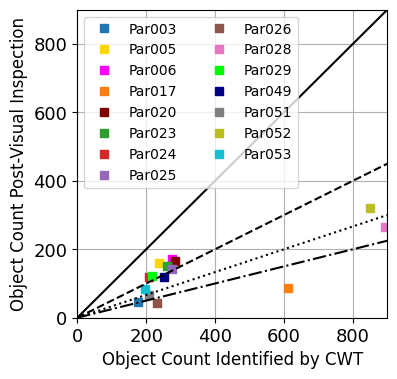

In [29]:
colors2=['tab:blue','gold','magenta','tab:orange','maroon','tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink','lime','navy','tab:gray','tab:olive', 'tab:cyan']
labs=['Par003','Par005','Par006','Par017','Par020','Par023','Par024','Par025','Par026','Par028','Par029','Par049','Par051','Par052','Par053']
fig = plt.figure(figsize=(4, 4)) 
for nnn in range(len(colors2)):
    plt.plot(initiallengths[nnn],finallengths[nnn],"s",color=colors2[nnn],label=labs[nnn])
#plt.plot([0,900],[0,900],color="k")
plt.plot([0,900],[0,900],"k")
plt.plot([0,900],[0,900/2],"k--")
plt.plot([0,900],[0,900/3],"k:")
plt.plot([0,900],[0,900/4],"k-.")
#plt.plot([0,900],[0,900/5],"k",linestyle='dashdotdotted')
#plt.plot([0,900],[0,900*.366],"blue")

plt.xlim(0,900)
plt.ylim(0,900)
plt.grid()
plt.xlabel('Object Count Identified by CWT', fontsize=12)
plt.ylabel(r'Object Count Post-Visual Inspection',fontsize=12)
plt.tick_params(axis='both', labelsize=13)
plt.legend(ncol=2,loc='upper left')

In [32]:
np.array(finallengths)/np.array(initiallengths)

array([0.26553672, 0.67510549, 0.61956522, 0.14215686, 0.58303887,
       0.57692308, 0.57211538, 0.52      , 0.19047619, 0.29642058,
       0.55963303, 0.47011952, 0.31400966, 0.37647059, 0.4213198 ])

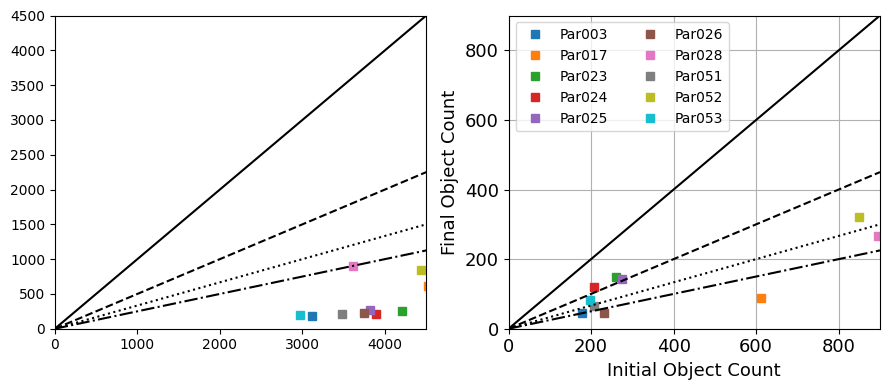

In [300]:
colors2=['tab:blue','tab:orange','tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink','tab:gray','tab:olive', 'tab:cyan']
labs=['Par003','Par017','Par023','Par024','Par025','Par026','Par028','Par051','Par052','Par053']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(9, 4)) 
allsources=np.array([3116,4526,4206,3890,3817,3744,3614,3473,4433,2971])

#28: 3038
for nnn in range(len(colors2)):
    ax1.plot(allsources[nnn],initiallengths[nnn],"s",color=colors2[nnn],label=labs[nnn])

ax1.plot([0,4500],[0,4500],"k")
ax1.plot([0,4500],[0,4500/2],"k--")
ax1.plot([0,4500],[0,4500/3],"k:")
ax1.plot([0,4500],[0,4500/4],"k-.")
ax1.set_xlim(0,4500)
ax1.set_ylim(0,4500)

for nnn in range(len(colors2)):
    plt.plot(initiallengths[nnn],finallengths[nnn],"s",color=colors2[nnn],label=labs[nnn])
#plt.plot([0,900],[0,900],color="k")
plt.plot([0,900],[0,900],"k")
plt.plot([0,900],[0,900/2],"k--")
plt.plot([0,900],[0,900/3],"k:")
plt.plot([0,900],[0,900/4],"k-.")
#plt.plot([0,900],[0,900/5],"k",linestyle='dashdotdotted')
#plt.plot([0,900],[0,900*.366],"blue")

plt.xlim(0,900)
plt.ylim(0,900)
plt.grid()
plt.xlabel('Initial Object Count', fontsize=13)
plt.ylabel(r'Final Object Count',fontsize=13)
plt.tick_params(axis='both', labelsize=13)
plt.legend(ncol=2,loc='upper left')
plt.tight_layout()

In [302]:
initiallengths/allsources

array([0.05680359, 0.13521874, 0.06181645, 0.05347044, 0.07204611,
       0.06169872, 0.24737133, 0.05960265, 0.19174374, 0.06630764])

In [258]:
file_path_class1 = '2024PASSAGE/data/linelist/Par025lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
#print(len(np.unique(dfcwt24[2])))
dfcwt24 = dfcwt24[dfcwt24[5] >10]
print(len(np.unique(dfcwt24[2])))
#plt.hist(dfcwt24[5],bins=30)

172


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_3921/3736402761.py:2: SyntaxWarning: invalid escape sequence '\s'
  dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')


In [249]:
min(dfcwt24[5])

-5.261789763537511

In [246]:
min(dfcwt24[5])

-3.36357637597624

In [259]:
#Number of unique Object in the linelist
initiallengths2=[]


file_path_class1 = '2024PASSAGE/data/linelist/Par003lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
#filtered_df = filtered_df[filtered_df['snr_Ha'] !=0]
initiallengths2.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par017lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))

#file_path_class1 = '2024PASSAGE/data/linelist/Par020lines.dat'
#dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
#initiallengths.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par023lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par024lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par025lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par026lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par028linescheck.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par051lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par052linescheck.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))

file_path_class1 = '2024PASSAGE/data/linelist/Par053lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))

initiallengths2



<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:46: SyntaxWarning: invalid escape sequence '\s'
<>:51: SyntaxWarning: invalid escape sequence '\s'
<>:56: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\s'
<>:36: SyntaxWarning: invalid escape sequence '\s'
<>:41: SyntaxWarning: invalid escape sequence '\s'
<>:46: SyntaxWarning: invalid escape sequence '\s'
<>:51: SyntaxWarning: invalid escape sequence '\s'
<>:56: SyntaxWarning: invalid esc

[82, 395, 153, 126, 172, 141, 437, 112, 464, 118]

In [291]:
file_path_class1 = '2024PASSAGE/data/linelist/Par028linescheck.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
#filtered_df = filtered_df[filtered_df['snr_Ha'] !=0]
initiallengths2.append(len(np.unique(dfcwt24[2])))
print(dfcwt24)
file_path_class1 = 'Par028lines_catalog_scarlata_with_flags.dat'
df7 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df7[df7['emline_flag'].isin(allowed)]
filtered_df = filtered_df[filtered_df['objid'].isin(np.array(dfcwt24[2]))]
finallengths2.append(len(filtered_df))
print(filtered_df)

       0     1     2             3   4           5
1     28  G200     4  18038.968260   6   19.339972
3     28  G200    18  20939.130367   5   14.897025
10    28  G200    52  19655.780777  11   19.360685
13    28  G150    54  15206.155171   3   12.967864
19    28  G115    70  12106.774975   5   17.496870
...   ..   ...   ...           ...  ..         ...
1277  28  G115  3585  11414.949521   8   19.274357
1280  28  G115  3591  10636.737720   6   25.147178
1281  28  G150  3591  13940.867406   5   14.393337
1283  28  G115  3600  11370.259040   5  131.227194
1284  28  G115  3602  11641.050357  15   73.893104

[591 rows x 6 columns]
     objid  redshift  redshift_error      ra_obj   dec_obj  f140w_mag  \
0        4   1.74734         0.00053  150.098489  2.395113      30.04   
8      116   1.24041         0.00000  150.099954  2.399546      26.80   
10     176   2.55552         0.00029  150.083809  2.401001      26.78   
52     703   3.05661         0.00000  150.088095  2.409022      27.88   

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_3921/700982382.py:2: SyntaxWarning: invalid escape sequence '\s'
  dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_3921/700982382.py:8: SyntaxWarning: invalid escape sequence '\s'
  df7 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')


In [293]:
finallengths2=[]
initiallengths2=[]
allowed = [1,2,3,4]

file_path_class1 = '2024PASSAGE/data/linelist/Par003lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
#filtered_df = filtered_df[filtered_df['snr_Ha'] !=0]
initiallengths2.append(len(np.unique(dfcwt24[2])))
file_path_class1 = 'Par003lines_catalog_matt_with_flags.dat'
df7 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df7[df7['emline_flag'].isin(allowed)]
filtered_df = filtered_df[filtered_df['objid'].isin(np.array(dfcwt24[2]))]
finallengths2.append(len(filtered_df))


file_path_class1 = '2024PASSAGE/data/linelist/Par017lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))
file_path_class1 = 'Par017lines_catalog_matt_with_flags.dat'
df10 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df10[df10['emline_flag'].isin(allowed)]
filtered_df = filtered_df[filtered_df['objid'].isin(np.array(dfcwt24[2]))]
finallengths2.append(len(filtered_df))

file_path_class1 = '2024PASSAGE/data/linelist/Par023lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))
file_path_class1 = 'Par023lines_reconciled_with_flags.dat'
df4 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df4[df4['emline_flag'].isin(allowed)]
filtered_df = filtered_df[filtered_df['objid'].isin(np.array(dfcwt24[2]))]
finallengths2.append(len(filtered_df))

file_path_class1 = '2024PASSAGE/data/linelist/Par024lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))
file_path_class1 = 'Par024lines_reconciled_with_flags.dat'
df1 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df1[df1['emline_flag'].isin(allowed)]
filtered_df = filtered_df[filtered_df['objid'].isin(np.array(dfcwt24[2]))]
finallengths2.append(len(filtered_df))

file_path_class1 = '2024PASSAGE/data/linelist/Par025lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))
file_path_class1 = 'Par025lines_reconciled_with_flags.dat'
df3 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df3[df3['emline_flag'].isin(allowed)]
filtered_df = filtered_df[filtered_df['objid'].isin(np.array(dfcwt24[2]))]
finallengths2.append(len(filtered_df))

file_path_class1 = '2024PASSAGE/data/linelist/Par026lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))
file_path_class1 = 'Par026lines_reconciled_with_flags.dat'
df6 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df6[df6['emline_flag'].isin(allowed)]
filtered_df = filtered_df[filtered_df['objid'].isin(np.array(dfcwt24[2]))]
finallengths2.append(len(filtered_df))

file_path_class1 = '2024PASSAGE/data/linelist/Par028linescheck.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))
file_path_class1 = 'Par028lines_catalog_scarlata_with_flags.dat'
df8 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df8[df8['emline_flag'].isin(allowed)]
filtered_df = filtered_df[filtered_df['objid'].isin(np.array(dfcwt24[2]))]
finallengths2.append(len(filtered_df))

file_path_class1 = '2024PASSAGE/data/linelist/Par051lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))
file_path_class1 = 'Par051lines_reconciled_with_flags.dat'
df2 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df2[df2['emline_flag'].isin(allowed)]
filtered_df = filtered_df[filtered_df['objid'].isin(np.array(dfcwt24[2]))]
finallengths2.append(len(filtered_df))

file_path_class1 = '2024PASSAGE/data/linelist/Par052linescheck.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))
file_path_class1 = 'Par052lines_catalog_vmehta_with_flags.dat'
df9 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df9[df9['emline_flag'].isin(allowed)]
filtered_df = filtered_df[filtered_df['objid'].isin(np.array(dfcwt24[2]))]
finallengths2.append(len(filtered_df))

file_path_class1 = '2024PASSAGE/data/linelist/Par053lines.dat'
dfcwt24 = pd.read_csv(file_path_class1, header=None,comment='#', sep='\s+')
dfcwt24 = dfcwt24[dfcwt24[5] >10]
initiallengths2.append(len(np.unique(dfcwt24[2])))
file_path_class1 = 'Par053lines_reconciled_with_flags.dat'
df5 = pd.read_csv(file_path_class1,header=0, comment='#', sep='\s+')
filtered_df = df5[df5['emline_flag'].isin(allowed)]
filtered_df = filtered_df[filtered_df['objid'].isin(np.array(dfcwt24[2]))]
finallengths2.append(len(filtered_df))



#df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
#df

finallengths2



<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:18: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:32: SyntaxWarning: invalid escape sequence '\s'
<>:38: SyntaxWarning: invalid escape sequence '\s'
<>:42: SyntaxWarning: invalid escape sequence '\s'
<>:48: SyntaxWarning: invalid escape sequence '\s'
<>:52: SyntaxWarning: invalid escape sequence '\s'
<>:58: SyntaxWarning: invalid escape sequence '\s'
<>:62: SyntaxWarning: invalid escape sequence '\s'
<>:68: SyntaxWarning: invalid escape sequence '\s'
<>:72: SyntaxWarning: invalid escape sequence '\s'
<>:78: SyntaxWarning: invalid escape sequence '\s'
<>:82: SyntaxWarning: invalid escape sequence '\s'
<>:88: SyntaxWarning: invalid escape sequence '\s'
<>:92: SyntaxWarning: invalid escape sequence '\s'
<>:98: SyntaxWarning: invalid escape sequence '\s'
<>:102: SyntaxWarning: invalid e

[33, 67, 106, 80, 104, 28, 31, 52, 211, 56]

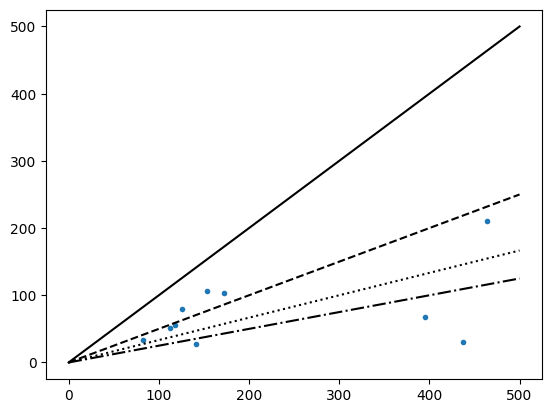

In [286]:
plt.plot(initiallengths2,finallengths2,".")
plt.plot([0,500],[0,500],"k")
plt.plot([0,500],[0,500/2],"k--")
plt.plot([0,500],[0,500/3],"k:")
plt.plot([0,500],[0,500/4],"k-.")

In [287]:
np.median(np.array(finallengths2)/np.array(initiallengths2))

0.4595135467980296

In [290]:
print(np.median(np.array(finallengths)/np.array(initiallengths)))
print(np.median(np.array(finallengths2)/np.array(initiallengths2)))
print(np.median(np.array(finallengths2)/np.array(finallengths)))
print(np.median(np.array(initiallengths2)/np.array(initiallengths)))

0.3452401250355215
0.4595135467980296
0.6906827309236947
0.5937231550175712


In [ ]:
Increasing the cap to SNR>10 from SNR>5 loses 30% of final objects, but loses 40% of objects to cycle through. 
On average we toss only about 55% of objects with the higher cutoff rather than 65% for the lower SNR>5.
30% loss of objects for 40% time saving. 


In [294]:
print(np.array(finallengths)/np.array(initiallengths))
print(np.array(finallengths2)/np.array(initiallengths2))

[0.25423729 0.14215686 0.57692308 0.57211538 0.52       0.19047619
 0.29642058 0.31400966 0.37647059 0.4213198 ]
[0.40243902 0.16962025 0.69281046 0.63492063 0.60465116 0.19858156
 0.07093822 0.46428571 0.45474138 0.47457627]


In [213]:
np.average(np.array(finallengths)/np.array(initiallengths))

0.36641294315761813

In [ ]:
#

In [111]:
m24[1].data['stellar_mass_16']

array([ 9.29115525,  8.67033066,  7.46699326,  8.67679294,  8.23584398,
        9.4811976 ,  9.71351641,  8.53226967,  7.4701331 ,  8.93107048,
        9.61354418,  8.04528422,  7.68763039,  7.91082634,  8.41719834,
        9.42043953,  6.66467009,  8.0572746 ,  9.16052897,  7.99046027,
        8.18160598,  6.94672242,  8.51927261,  8.17871282,  7.62052697,
        8.8809927 ,  9.15399583,  9.93667393,  6.76728592,  9.37162208,
        8.58903576,  8.31136558,  8.35922749,  8.45787406,  8.0772557 ,
        8.53186442,  7.17072777,  9.01675533,  7.87551616,  8.52768445,
        7.68885853,  9.8406615 ,  8.42729231,  9.95518475,  8.93807774,
        8.79684779,  8.96782476,  8.5009694 ,  9.37430388,  8.49884852,
        7.04971763,  8.05109096,  6.76367972,  9.41988703,  9.35006559,
       10.21676511,  8.54212135,  7.83137162,  7.19379807,  9.46637453,
        7.23344451,  7.64428061,  8.10941269,  8.70927247,  8.58255409,
        8.58255409,  7.98136477,  8.2767132 ,  7.82280117,  9.31

In [112]:
m24[1].data['stellar_mass_84']

array([ 9.38975885,  9.00416465,  7.87180079,  8.81267864,  8.4836516 ,
        9.69654671,  9.99526193,  8.68793995,  7.81473211,  9.05144461,
        9.78217926,  8.2495351 ,  7.90384312,  8.15069464,  8.63786487,
        9.5950168 ,  7.15388015,  8.37321189,  9.36749912,  8.21819826,
        8.42803374,  7.41709126,  8.8884299 ,  8.68497106,  7.9340113 ,
        9.00908614,  9.37887859, 10.04617592,  7.23318936,  9.49503343,
        8.87753124,  8.56901416,  8.50297822,  8.70471404,  8.33416024,
        8.77907268,  7.79250038,  9.24764916,  7.9925549 ,  8.72085528,
        7.99555714, 10.01121114,  8.65040833, 10.09546839,  9.13042304,
        8.9132796 ,  9.16559558,  8.65471684,  9.45252975,  8.6792728 ,
        7.56458252,  8.38830554,  7.32170758,  9.6102684 ,  9.40878828,
       10.40338281,  8.862202  ,  8.18324969,  7.36990659,  9.72201905,
        7.43450513,  7.99522253,  8.4063442 ,  8.83266217,  8.7700455 ,
        8.7700455 ,  8.13573324,  8.49259215,  8.06626713,  9.42

[191, 416, 465, 507, 54, 3, 3]


/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_4788/1888018096.py:66: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'o3o2hb' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[i, 'catagory'] = 'o3o2hb'


Text(0.5, 1.0, 'PASSAGE Line Counts')

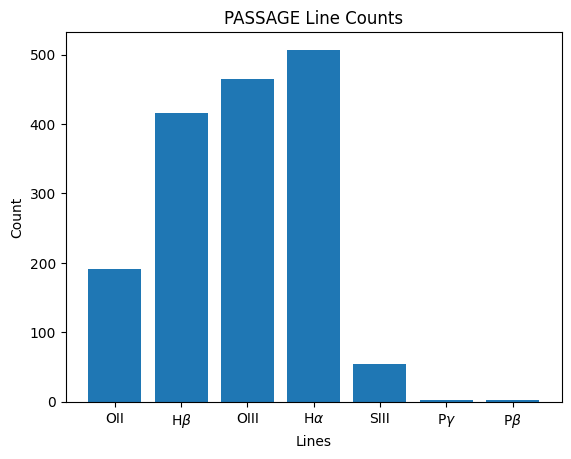

In [7]:
categories=['OII',r'H$\beta$','OIII',r'H$\alpha$','SIII',r'P$\gamma$',r'P$\beta$']
ha=0
hb=0
o3=0
o2=0
pg=0
pb=0
s3=0

o2only=0
o3only=0
haonly=0
s3only=0
pbonly=0
o3o2hb=0
o3hb=0
hao3=0
hahbo3=0
has3=0
hapb=0
s3pb=0
hbo2=0
o2o3=0
hahb=0
#hahbo3o2=0

df['catagory'] = 0

for i in range(len(df)):
    if df['ha_6550_6565_6585_flux'][i]>0:
        ha+=1
    if df['hb_4863_flux'][i]>0:
        hb+=1
    if df['o3_4959_5007_flux'][i]>0:
        o3+=1
    if df['o2_3727_3730_flux'][i]>0:
        o2+=1
    if df['pg_10941_flux'][i]>0:
        pg+=1
    if df['pb_12822_flux'][i]>0:
        pb+=1
    if df['s3_9069_9532_flux'][i]>0:
        s3+=1

    
    if (df['s3_9069_9532_flux'][i]>0) and (df['pb_12822_flux'][i]>0) and (df['ha_6550_6565_6585_flux'][i]<=0) and (df['o2_3727_3730_flux'][i]<=0) and (df['o3_4959_5007_flux'][i]<=0) and (df['hb_4863_flux'][i]<=0):#Want to only see s3 and pb
        s3pb+=1
        df.at[i, 'catagory'] = 's3pb'
    elif (df['s3_9069_9532_flux'][i]>0) and (df['ha_6550_6565_6585_flux'][i]>0) and (df['pb_12822_flux'][i]<=0) and (df['o2_3727_3730_flux'][i]<=0) and (df['o3_4959_5007_flux'][i]<=0) and (df['hb_4863_flux'][i]<=0):#only see ha and s3
        has3+=1
        df.at[i, 'catagory'] = 'has3'
    elif (df['pb_12822_flux'][i]>0) and (df['ha_6550_6565_6585_flux'][i]>0) and (df['s3_9069_9532_flux'][i]<=0) and (df['o2_3727_3730_flux'][i]<=0) and (df['o3_4959_5007_flux'][i]<=0) and (df['hb_4863_flux'][i]<=0):#only see ha and pb
        hapb+=1
        df.at[i, 'catagory'] = 'hapb'
    elif (df['o3_4959_5007_flux'][i]>0) and (df['ha_6550_6565_6585_flux'][i]>0) and (df['hb_4863_flux'][i]<=0) and (df['o2_3727_3730_flux'][i]<=0) and (df['pb_12822_flux'][i]<=0):#only see ha and o3
        hao3+=1
        df.at[i, 'catagory'] = 'hao3'
    elif (df['o3_4959_5007_flux'][i]>0) and (df['hb_4863_flux'][i]>0) and (df['ha_6550_6565_6585_flux'][i]<=0) and (df['o2_3727_3730_flux'][i]<=0) and (df['pb_12822_flux'][i]<=0):#only see hb and o3
        o3hb+=1
        df.at[i, 'catagory'] = 'o3hb'
    elif (df['o3_4959_5007_flux'][i]>0) and (df['hb_4863_flux'][i]>0) and (df['ha_6550_6565_6585_flux'][i]>0) and (df['o2_3727_3730_flux'][i]<=0) and (df['pb_12822_flux'][i]<=0):#only see o3, ha, and hb
        hahbo3+=1
        df.at[i, 'catagory'] = 'hahbo3'
    elif (df['o3_4959_5007_flux'][i]>0) and (df['hb_4863_flux'][i]>0) and (df['o2_3727_3730_flux'][i]>0)+(df['ha_6550_6565_6585_flux'][i]<=0):#only see o3, o2, and hb
        o3o2hb+=1
        df.at[i, 'catagory'] = 'o3o2hb'
    elif (df['ha_6550_6565_6585_flux'][i]>0) and (df['o3_4959_5007_flux'][i]<=0) and (df['s3_9069_9532_flux'][i]<=0) and (df['pb_12822_flux'][i]<=0) and (df['hb_4863_flux'][i]<=0) and (df['o2_3727_3730_flux'][i]<=0):#Only see ha with no o3,s3,hb,pb
        haonly+=1
        df.at[i, 'catagory'] = 'haonly'
    elif (df['ha_6550_6565_6585_flux'][i]<=0) and (df['o3_4959_5007_flux'][i]>0) and (df['s3_9069_9532_flux'][i]<=0) and (df['o2_3727_3730_flux'][i]<=0) and (df['hb_4863_flux'][i]<=0) and (df['pb_12822_flux'][i]<=0):#Only see o3 with no ha,s3,hb,o2
        o3only+=1
        df.at[i, 'catagory'] = 'o3only'
    elif (df['ha_6550_6565_6585_flux'][i]<=0) and (df['o3_4959_5007_flux'][i]<=0) and (df['s3_9069_9532_flux'][i]<=0) and (df['o2_3727_3730_flux'][i]>0) and (df['hb_4863_flux'][i]<=0) and (df['pb_12822_flux'][i]<=0):#Only see o2
        o2only+=1
        df.at[i, 'catagory'] = 'o2only'
    elif (df['ha_6550_6565_6585_flux'][i]<=0) and (df['o3_4959_5007_flux'][i]<=0) and (df['s3_9069_9532_flux'][i]>0) and (df['o2_3727_3730_flux'][i]<=0) and (df['hb_4863_flux'][i]<=0) and (df['pb_12822_flux'][i]<=0):#Only see s3
        s3only+=1
        df.at[i, 'catagory'] = 's3only'
    elif (df['ha_6550_6565_6585_flux'][i]<=0) and (df['o3_4959_5007_flux'][i]<=0) and (df['s3_9069_9532_flux'][i]<=0) and (df['o2_3727_3730_flux'][i]<=0) and (df['hb_4863_flux'][i]<=0) and (df['pb_12822_flux'][i]>0):#Only see pb
        pbonly+=1
        df.at[i, 'catagory'] = 'pbonly'
    elif (df['ha_6550_6565_6585_flux'][i]<=0) and (df['o3_4959_5007_flux'][i]<=0) and (df['s3_9069_9532_flux'][i]<=0) and (df['o2_3727_3730_flux'][i]>0) and (df['hb_4863_flux'][i]>0) and (df['pb_12822_flux'][i]<=0):#Only see hb and o2
        hbo2+=1
        df.at[i, 'catagory'] = 'hbo2'
    elif (df['ha_6550_6565_6585_flux'][i]<=0) and (df['o3_4959_5007_flux'][i]>0) and (df['s3_9069_9532_flux'][i]<=0) and (df['o2_3727_3730_flux'][i]>0) and (df['hb_4863_flux'][i]<=0) and (df['pb_12822_flux'][i]<=0):#Only see hb and o2
        o2o3+=1
        df.at[i, 'catagory'] = 'o2o3'
    elif (df['ha_6550_6565_6585_flux'][i]>0) and (df['o3_4959_5007_flux'][i]<=0) and (df['s3_9069_9532_flux'][i]<=0) and (df['o2_3727_3730_flux'][i]<=0) and (df['hb_4863_flux'][i]>0) and (df['pb_12822_flux'][i]<=0):#Only see ha and hb
        hahb+=1
        df.at[i, 'catagory'] = 'hahb'
    else:
        df.at[i, 'catagory'] = 'bad'
        #print('lost', df.iloc[i])
        
values=[o2,hb,o3,ha,s3,pg,pb]
print(values)
plt.bar(categories, values)
plt.xlabel('Lines')
plt.ylabel('Count')
plt.title('PASSAGE Line Counts')

In [122]:
df

,objid,redshift,redshift_error,ra_obj,dec_obj,snr_tot_others,ha_6550_6565_6585_flux,hb_4863_flux,o3_4959_5007_flux,o2_3727_3730_flux,pg_10941_flux,pb_12822_flux,s3_9069_9532_flux,Par,catagory
0,8,1.96988,0.00000,150.142174,2.476397,7.33,-1.0,1.330000e+02,1.460000e+03,1.660000e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,Par024,o3o2hb
1,9,1.97364,0.00025,150.142183,2.476540,41.54,-1.0,2.400000e+02,1.640000e+03,1.810000e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,Par024,o3o2hb
2,31,0.81933,0.00000,150.143154,2.478128,8.65,3610.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,Par024,haonly
3,91,2.11985,0.00115,150.144131,2.480157,10.53,-1.0,9.430000e+01,1.320000e+03,5.350000e+01,-1.000000e+00,-1.000000e+00,-1.000000e+00,Par024,o3o2hb
4,143,2.13190,0.00000,150.133466,2.481628,9.00,-1.0,4.630000e-01,1.390000e+02,6.350000e+01,-1.000000e+00,-1.000000e+00,-1.000000e+00,Par024,o3o2hb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,3550,0.24983,0.00042,150.118840,2.456195,3.37,-1.0,-1.000000e+00,-1.000000e+00,-1.000000e+00,3.550000e-20,2.600000e-18,5.230000e-18,Par026,s3pb
834,3566,2.19202,0.00000,150.111143,2.456448,6.42,-1.0,1.460000e-18,2.520000e-18,9.910000e-18,-1.000000e+00,-1.000000e+00,-1.000000e+00,Par026,o3o2hb
835,3595,2.19244,0.00049,150.111807,2.456957,16.13,-1.0,5.540000e+02,2.300000e+03,8.940000e+01,-1.000000e+00,-1.000000e+00,-1.000000e+00,Par026,o3o2hb
836,3612,2.20299,0.00126,150.111722,2.457258,7.14,-1.0,9.810000e+01,7.980000e+02,1.080000e+02,-1.000000e+00,-1.000000e+00,-1.000000e+00,Par026,o3o2hb


[0 0 0 0 0 0 1 2 1 1 1 0 0 0 1 0 0 0 2 0 0 0 0 0 1 1 0 0 0]
[0 0 0 0 0 0 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[ 0  0  0  0  0  0  0  0 11 50 55 53 22  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0]
[ 0  0  0  0  0  0  0  0  9 11  3  3  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0]
[ 0  0  0  0 14 29 72 63  5  2  2  0  2  0 11  9 13  7  3  3  0  0  0  0
  0  0  0  0  0]
[ 0  0  0  0  9 42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 4 1 5 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 3 6 9 0 0 0 1 0 0 0 0 0 5 4 3 2 8 5 1]
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9 31 48 32 43  8  0  0  0  0
  0  0  0  0  0]
[0 0 0 0 0 0 0 0 0 2 3 1 0 1 7 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[1 1 0 0 0

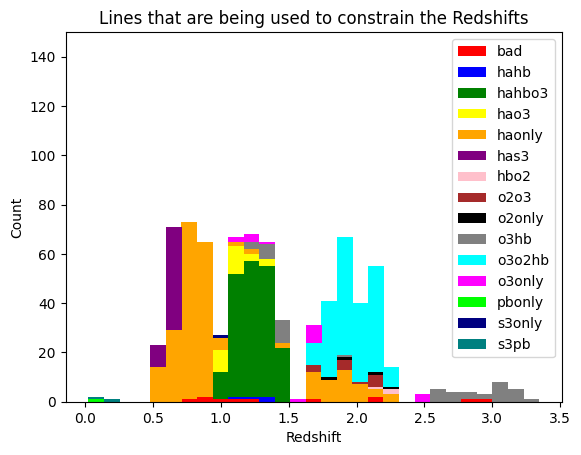

In [9]:
nbins=30
bins = np.linspace(np.min(df['redshift']),np.max(df['redshift']),nbins)#np.arange(0,4,20)
grouped = df.groupby('catagory')
bottom = np.zeros(len(bins) - 1)
cc=0
colors = [
    "red",
    "blue",
    "green",
    "yellow",
    "orange",
    "purple",
    "pink",
    "brown",
    "black",
    "gray",
    "cyan",
    "magenta",
    "lime",
    "navy",
    "teal"
]
for label, group in grouped:
    #if label=='bad':
    #    continue
    #print(label,group)
    #plt.hist(group['redshift'])
    #plt.show()
    counts, _ = np.histogram(group['redshift'], bins=bins)
    print(counts)
    plt.bar(bins[:-1], counts, color=colors[cc],width=3.5/nbins, bottom=bottom, label=label, alpha=1)
    bottom += counts  # update bottom for stacking
    cc+=1

plt.xlabel('Redshift')
plt.ylabel('Count')
plt.ylim(0,150)
plt.title('Lines that are being used to constrain the Redshifts')
plt.legend()
plt.show()


In [131]:
dfo3o2hb = df[df['catagory'] == 'o3o2hb']
print(np.min(dfo3o2hb['redshift']))
print(np.max(dfo3o2hb['redshift']))
print(len(dfo3o2hb))
dfo3o2hb

1.76129
2.31905
183


,objid,redshift,redshift_error,ra_obj,dec_obj,snr_tot_others,ha_6550_6565_6585_flux,hb_4863_flux,o3_4959_5007_flux,o2_3727_3730_flux,pg_10941_flux,pb_12822_flux,s3_9069_9532_flux,Par,catagory
0,8,1.96988,0.00000,150.142174,2.476397,7.33,-1.0,1.330000e+02,1.460000e+03,1.660000e+02,-1.0,-1.0,-1.0,Par024,o3o2hb
1,9,1.97364,0.00025,150.142183,2.476540,41.54,-1.0,2.400000e+02,1.640000e+03,1.810000e+02,-1.0,-1.0,-1.0,Par024,o3o2hb
3,91,2.11985,0.00115,150.144131,2.480157,10.53,-1.0,9.430000e+01,1.320000e+03,5.350000e+01,-1.0,-1.0,-1.0,Par024,o3o2hb
4,143,2.13190,0.00000,150.133466,2.481628,9.00,-1.0,4.630000e-01,1.390000e+02,6.350000e+01,-1.0,-1.0,-1.0,Par024,o3o2hb
5,183,1.96633,0.00053,150.126745,2.482093,17.62,-1.0,6.420000e+01,2.930000e+02,2.150000e+02,-1.0,-1.0,-1.0,Par024,o3o2hb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,3472,2.15480,0.00127,150.127993,2.455201,7.24,-1.0,2.440000e-18,3.670000e-18,2.530000e-17,-1.0,-1.0,-1.0,Par026,o3o2hb
831,3519,2.03957,0.00000,150.121315,2.455735,4.62,-1.0,7.450000e+01,1.750000e+02,4.520000e+00,-1.0,-1.0,-1.0,Par026,o3o2hb
834,3566,2.19202,0.00000,150.111143,2.456448,6.42,-1.0,1.460000e-18,2.520000e-18,9.910000e-18,-1.0,-1.0,-1.0,Par026,o3o2hb
835,3595,2.19244,0.00049,150.111807,2.456957,16.13,-1.0,5.540000e+02,2.300000e+03,8.940000e+01,-1.0,-1.0,-1.0,Par026,o3o2hb


In [142]:
np.unique(df['catagory'])

array(['bad', 'hahb', 'hahbo3', 'hao3', 'haonly', 'has3', 'hbo2', 'o2o3',
       'o2only', 'o3hb', 'o3o2hb', 'o3only', 'pbonly', 's3only', 's3pb'],
      dtype=object)

hahb -4 [1.13957, 1.43616] 4
hahbo3 -208 [1.081, 1.53722] 208
hao3 -28 [1.03308, 1.44702] 28
haonly -244 [0.56668, 2.33244] 244
has3 -65 [0.58778, 0.74935] 65
hbo2 -3 [2.22411, 2.34989] 3
o2o3 -15 [1.71203, 2.245485] 15
o2only -5 [1.82174, 2.6677] 5
o3hb -47 [1.25808, 3.40055] 47
o3o2hb -183 [1.76129, 2.31905] 183
o3only -18 [1.193745, 2.58228] 18
pbonly -1 [0.08103, 0.08103] 1
s3only -1 [1.08772, 1.08772] 1
s3pb -3 [0.11631, 0.26284] 3


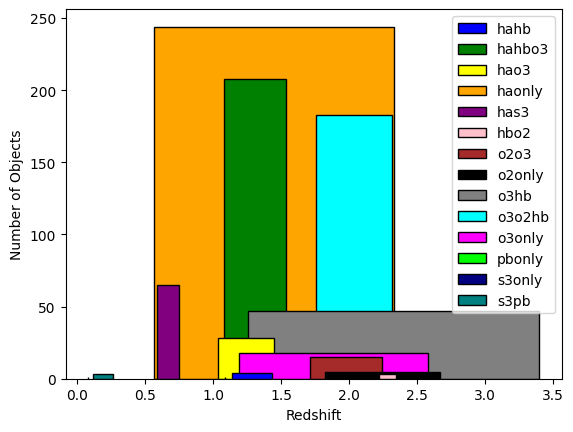

In [166]:
from collections import Counter
repeats = Counter(df['catagory'])
cats=np.unique(df['catagory'])
#smallest count=highest zorder


cc=0
for i in cats:
    if i=='bad':
        cc+=1
        continue
    dftrimmed = df[df['catagory'] == i]
    bin_edges = [np.min(dftrimmed['redshift']), np.max(dftrimmed['redshift'])]
    print(i,repeats[i]*-1,bin_edges,len(dftrimmed))
    data = [np.median(dftrimmed['redshift'])]  # a dummy data point inside the bin
    plt.hist(data, bins=bin_edges, weights=[len(dftrimmed)], color=colors[cc], edgecolor="k",zorder=repeats[i]*-1,label=i)
    cc+=1
plt.xlabel('Redshift')
plt.ylabel('Number of Objects')
plt.legend()
#plt.title('Histogram with One Bin and Specified Count')
plt.show()


In [ ]:
#cycle through the phot_cat file, isolate linelist objs, separate rej from acc gals
path='2024PASSAGE/data/Par024/DATA/DIRECT_GRISM/Par024_photcat.fits'
photcat=fits.open(path)

path='2024PASSAGE/data/linelist/Par024lines.dat'
prelimlinelist=fits.open(path)

#path='Par024lines_catalog_master.dat'
#finallinelist=fits.open(path)
df1


In [169]:
path='2024PASSAGE/data/Par024/DATA/DIRECT_GRISM/Par024_photcat.fits'
photcat=fits.open(path)
photcat=Table(photcat[1].data)#['mag_auto']
photcat

id,thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2_image,y2_image,xy_image,errx2,erry2,errxy,a_image,b_image,theta_image,cxx_image,cyy_image,cxy_image,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag,x_image,y_image,number,ra,dec,x_world,y_world,flux_iso,fluxerr_iso,area_iso,mag_iso,kron_radius,kron_rcirc,flux_auto,fluxerr_auto,bkg_auto,flag_auto,area_auto,flux_radius_flag,flux_radius_20,flux_radius,flux_radius_90,tot_corr,mag_auto,magerr_auto,flux_aper_0,fluxerr_aper_0,flag_aper_0,bkg_aper_0,mask_aper_0,flux_aper_1,fluxerr_aper_1,flag_aper_1,bkg_aper_1,mask_aper_1,flux_aper_2,fluxerr_aper_2,flag_aper_2,bkg_aper_2,mask_aper_2,flux_aper_3,fluxerr_aper_3,flag_aper_3,bkg_aper_3,mask_aper_3,flux_aper_4,fluxerr_aper_4,flag_aper_4,bkg_aper_4,mask_aper_4,flux_aper_5,fluxerr_aper_5,flag_aper_5,bkg_aper_5,mask_aper_5,flux_aper_6,fluxerr_aper_6,flag_aper_6,bkg_aper_6,mask_aper_6,flux_aper_7,fluxerr_aper_7,flag_aper_7,bkg_aper_7,mask_aper_7,f150w_flux_aper_0,f150w_fluxerr_aper_0,f150w_flag_aper_0,f150w_bkg_aper_0,f150w_mask_aper_0,f150w_flux_aper_1,f150w_fluxerr_aper_1,f150w_flag_aper_1,f150w_bkg_aper_1,f150w_mask_aper_1,f150w_flux_aper_2,f150w_fluxerr_aper_2,f150w_flag_aper_2,f150w_bkg_aper_2,f150w_mask_aper_2,f150w_flux_aper_3,f150w_fluxerr_aper_3,f150w_flag_aper_3,f150w_bkg_aper_3,f150w_mask_aper_3,f150w_flux_aper_4,f150w_fluxerr_aper_4,f150w_flag_aper_4,f150w_bkg_aper_4,f150w_mask_aper_4,f150w_flux_aper_5,f150w_fluxerr_aper_5,f150w_flag_aper_5,f150w_bkg_aper_5,f150w_mask_aper_5,f150w_flux_aper_6,f150w_fluxerr_aper_6,f150w_flag_aper_6,f150w_bkg_aper_6,f150w_mask_aper_6,f150w_flux_aper_7,f150w_fluxerr_aper_7,f150w_flag_aper_7,f150w_bkg_aper_7,f150w_mask_aper_7,f150w_tot_corr
int32,float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,float64,float64,int32,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,int64,float64,int16,float64,float64,float64,float64,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64,float64,int16,float64,float64,float64
1,1.500000098129063e+30,1562,0,0,520,0,2,236.00005373438353,1.0001104517657986,19264.67391505352,0.6365634006035981,0.0433961764654498,0.0,0.0,0.0,138.7972412109375,0.797849178314209,2.2527042347064707e-06,5.1908489695051685e-05,1.5709357261657715,-7.077472673699958e-06,0.10192941177290776,0.1718603934910071,8.823149393707877e-05,0.00013735840662567456,3,1,0,0,2,237.00005373438353,2.0001104517657984,1,150.1555352913775,2.4736628627227804,150.1555352913775,2.4736628627227804,0.0,0.0,0,inf,2.4,25.255854084745803,nan,nan,nan,48,2003.8905269240515,48,0.0,0.0,0.0,1.0,nan,nan,nan,nan,32,nan,16.839800770339338,nan,nan,48,nan,27.10537441084407,nan,nan,48,nan,54.04282216974057,nan,nan,48,nan,133.94922522879386,nan,nan,48,nan,319.17107109086635,nan,nan,48,nan,486.26839753101353,nan,nan,48,nan,1056.708192553452,nan,nan,48,nan,1845.302847726585,nan,nan,32,nan,16.839800766485773,nan,nan,48,nan,27.105374405108357,nan,nan,48,nan,54.042822160550074,nan,nan,48,nan,133.949225212999,nan,nan,48,nan,319.17107106533797,nan,nan,48,nan,486.2683974990296,nan,nan,48,nan,1056.708192505368,nan,nan,48,nan,1845.3028476624215,1.0
2,1.500000098129063e+30,4448,0,647,2129,0,2,1528.0621777010456,0.9998664078297832,158080.4856482579,0.636563496437913,-0.0813683485139336,0.0,0.0,0.0,397.5

In [ ]:
-2.5*np.log10(photcat[])/3631



In [170]:
photcat['npix'][1]

4448

In [175]:
path='2024PASSAGE/data/linelist/Par024lines.dat'
prelimlinelist = pd.read_csv(path, header=None,sep='\s+')
prelimlinelist

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_6549/284807707.py:2: SyntaxWarning: invalid escape sequence '\s'
  prelimlinelist = pd.read_csv(path, header=None,sep='\s+')


,0,1,2,3,4,5
0,24,G150,8,14890.603117,3,8.608228
1,24,G115,9,11105.766265,6,27.801071
2,24,G115,9,11504.858089,3,6.674123
3,24,G150,9,14890.603117,9,68.239599
4,24,G115,25,10595.093737,8,11.452746
...,...,...,...,...,...,...
261,24,G115,3815,12346.577896,6,43.425475
262,24,G115,3829,10471.137390,3,10.520345
263,24,G115,3836,12395.105433,4,26.458829
264,24,G115,3842,10720.517328,3,6.390674


In [179]:
np.unique(prelimlinelist[2])

array([   8,    9,   25,   30,   31,   37,   39,   91,  100,  143,  145,
        167,  183,  186,  233,  332,  349,  389,  424,  433,  434,  444,
        449,  522,  526,  557,  576,  617,  640,  658,  706,  731,  736,
        739,  750,  758,  762,  779,  792,  814,  838,  847,  880,  905,
        988,  992, 1027, 1050, 1072, 1074, 1076, 1096, 1105, 1140, 1161,
       1173, 1196, 1214, 1249, 1259, 1334, 1353, 1379, 1380, 1422, 1457,
       1470, 1487, 1515, 1522, 1523, 1526, 1532, 1553, 1564, 1577, 1583,
       1603, 1624, 1633, 1699, 1787, 1802, 1810, 1849, 1870, 1880, 1897,
       1899, 1900, 1911, 1912, 1921, 1932, 1966, 1987, 1989, 2007, 2011,
       2025, 2050, 2108, 2125, 2165, 2194, 2229, 2234, 2262, 2266, 2278,
       2305, 2316, 2379, 2413, 2419, 2422, 2449, 2454, 2472, 2474, 2530,
       2537, 2548, 2574, 2580, 2600, 2648, 2649, 2650, 2651, 2662, 2667,
       2681, 2691, 2696, 2699, 2708, 2709, 2731, 2736, 2738, 2759, 2761,
       2764, 2807, 2817, 2821, 2826, 2856, 2870, 28

In [178]:
path='Par024lines_catalog_master.dat'
finallinelist = pd.read_csv(path, header=0,sep='\s+')
finallinelist


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/var/folders/v1/3zv2nkl92xnd00kcpp2yb_580000gn/T/ipykernel_6549/152830030.py:2: SyntaxWarning: invalid escape sequence '\s'
  finallinelist = pd.read_csv(path, header=0,sep='\s+')


,objid,redshift,redshift_error,ra_obj,dec_obj,f140w_mag,a_image_obj,b_image_obj,snr_tot_others,chisq,...,pa_18756_flux,pa_18756_error,pa_18756_ew_obs,pa_18756_ratio,pa_18756_contam,ne3_3869_flux,ne3_3869_error,ne3_3869_ew_obs,ne3_3869_ratio,ne3_3869_contam
0,8,1.96988,0.00000,150.142174,2.476397,25.52,3.587,2.976,7.33,9.88,...,-1.0,0.0,0,3.460000e-19,5.880000e-19,13.3,0.0,0,NaN,NaN
1,9,1.97364,0.00025,150.142183,2.476540,24.11,4.029,2.975,41.54,15.14,...,-1.0,0.0,0,1.040000e-17,8.590000e-19,76.2,0.0,0,NaN,NaN
2,31,0.81933,0.00000,150.143154,2.478128,26.57,2.899,2.584,8.65,9.35,...,-1.0,0.0,0,-1.000000e+00,-1.000000e+00,-1.0,0.0,0,NaN,NaN
3,91,2.11985,0.00115,150.144131,2.480157,24.91,3.009,2.087,10.53,10.20,...,-1.0,0.0,0,1.200000e-18,4.990000e-19,32.3,0.0,0,NaN,NaN
4,143,2.13190,0.00000,150.133466,2.481628,24.23,6.425,3.035,9.00,15.09,...,-1.0,0.0,0,9.570000e-19,8.660000e-19,7.6,0.0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,3703,1.42841,0.00177,150.126082,2.517314,25.87,3.036,2.688,9.20,14.32,...,-1.0,0.0,0,-1.000000e+00,-1.000000e+00,-1.0,0.0,0,NaN,NaN
125,3713,2.28332,0.00099,150.131621,2.517379,24.77,4.382,3.210,4.47,13.08,...,-1.0,0.0,0,1.690000e-18,9.090000e-19,34.8,0.0,0,NaN,NaN
126,3721,0.59215,0.00041,150.119086,2.517642,25.10,4.774,2.951,0.00,-5.07,...,-1.0,0.0,0,-1.000000e+00,-1.000000e+00,-1.0,0.0,0,NaN,NaN
127,3726,2.29374,0.00209,150.127834,2.517718,25.25,4.258,2.594,3.12,10.53,...,-1.0,0.0,0,3.410000e-18,1.360000e-18,74.4,0.0,0,NaN,NaN


In [185]:
catids=np.array(photcat['id'])
catids

array([   1,    2,    3, ..., 3888, 3889, 3890], dtype='>i4')

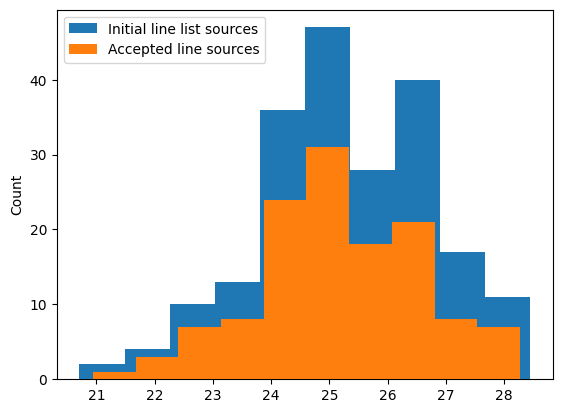

In [201]:
path='2024PASSAGE/data/Par024/DATA/DIRECT_GRISM/Par024_photcat.fits'
photcat=fits.open(path)
photcat=Table(photcat[1].data)#['mag_auto']
#photcat

catids=np.array(photcat['id'])
prelimids=np.unique(prelimlinelist[2])
finalids=np.unique(finallinelist['objid'])
catmags=[]
prelimmags=[]
finalmags=[]
for i in catids:
    mag=photcat['mag_auto'][i-1]#because the first id is 0
    if np.isnan(mag)==True:
        continue
    if i in finalids:#no rejected sources
        finalmags.append(mag)
    if i in prelimids:
        prelimmags.append(mag)
    catmags.append(mag)
    
len(finalmags)
#plt.hist(catmags,zorder=0,bins)
#plt.hist(np.log10(catmags),zorder=0,label='All catalog sources')
plt.hist(prelimmags,zorder=5,label='Initial line list sources')
plt.hist(finalmags,zorder=10,label='Accepted line sources')
#plt.title('Rejected Sources')
plt.ylabel('Count')
#plt.xlabel('Log Mag Auto')
plt.legend()



In [202]:
fits.open('2024PASSAGE/data/Par029/spec2D/Par029_00036.spec2D.fits')

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x15013ef60>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14cd8f230>, <astropy.io.fits.hdu.image.ImageHDU object at 0x150027dd0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x150024c80>, <astropy.io.fits.hdu.image.ImageHDU object at 0x150024fe0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x150025a60>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14fdfcb00>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14fdfd5e0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14fdfdd60>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14fdfe450>, <astropy.io.fits.hdu.image.ImageHDU object at 0x14fdfeea0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1500250d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1500241a0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x1500241d0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x150027f20>, <astropy.io.fits.hdu.image.ImageHDU object at 0x150027710>, <astropy.io.fits.hdu.image.ImageHDU o

In [187]:
photcat['flux_auto'][10]

0.03453999299221041

In [119]:



'''
o2only
o3only
haonly
s3only
pbonly
o3o2hb
o3hb
hao3
hahbo3
has3
hapb
s3pb
hbo2
o2o3
hahb
'''
print(o3o2hb+hahbo3o2+o2only+o2o3+hbo2)
print(o3o2hb+hahbo3o2+o3hb+hahbo3+hbo2+hahb)
print(o3only+o3o2hb+o3hb+hahbo3+hao3+hahbo3o2+o2o3)

print(haonly+hahbo3+hao3+hapb+hahbo3o2+has3+hahb)

print(s3pb+has3+s3only)

print(hapb+s3pb+pbonly)

206
445
499
549
69
4


(array([  4.,   0.,  70., 174.,  55., 136.,  99.,  27.,  95., 103.,  39.,
          4.,   9.,   6.,  12.,   3.,   0.,   0.,   0.,   2.]),
 array([0.08103  , 0.2924675, 0.503905 , 0.7153425, 0.92678  , 1.1382175,
        1.349655 , 1.5610925, 1.77253  , 1.9839675, 2.195405 , 2.4068425,
        2.61828  , 2.8297175, 3.041155 , 3.2525925, 3.46403  , 3.6754675,
        3.886905 , 4.0983425, 4.30978  ]),
 <BarContainer object of 20 artists>)

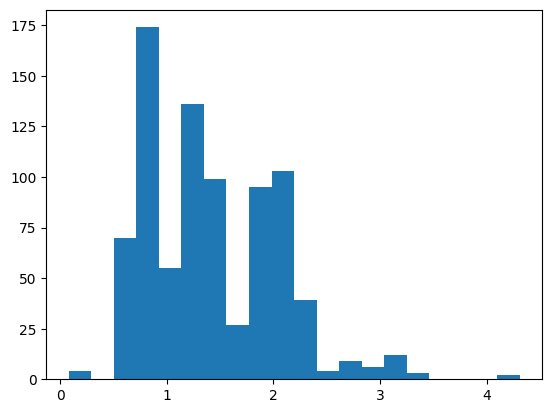

In [13]:
plt.hist(df['redshift'],bins=20)

In [35]:
samp_x = np.array(df['ra_obj'])#.data
samp_y = np.array(df['dec_obj'])#.data
cat_x = hdu[1].data['ra      ']#dat['ra      ']#.data
cat_y = hdu[1].data['dec     ']#dat['dec     ']#.data
#print(samp_x)

sel_samp, idx = match_catalogs(samp_x, samp_y, cat_x, cat_y,max_sep=0.1*u.arcsec)

tt = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt[sel_samp] = hdu[1].data['ra      '][idx[sel_samp]]

tt2 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt2[sel_samp] = hdu[1].data['dec     '][idx[sel_samp]]

tt3 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt3[sel_samp] = hdu[1].data['id      '][idx[sel_samp]]

tt4 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt4[sel_samp] = hdu2[1].data['zfinal  '][idx[sel_samp]]

tt5 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt5[sel_samp] = hdu2[1].data['zpdf_med'][idx[sel_samp]]

tt6 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt6[sel_samp] = hdu2[1].data['zpdf_l68'][idx[sel_samp]]

tt7 = np.ones(shape=(len(np.array(df['ra_obj'])),)) * (-1)
tt7[sel_samp] = hdu2[1].data['zpdf_u68'][idx[sel_samp]]

df['cosmosra']=tt
df['cosmosdec']=tt2
df['cosmosid']=tt3
df['cosmosz']=tt4
df['cosmoszmed']=tt5
df['cosmoszlow']=tt6
df['cosmoszup']=tt7

(array([0., 1., 2., 3., 4., 5.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

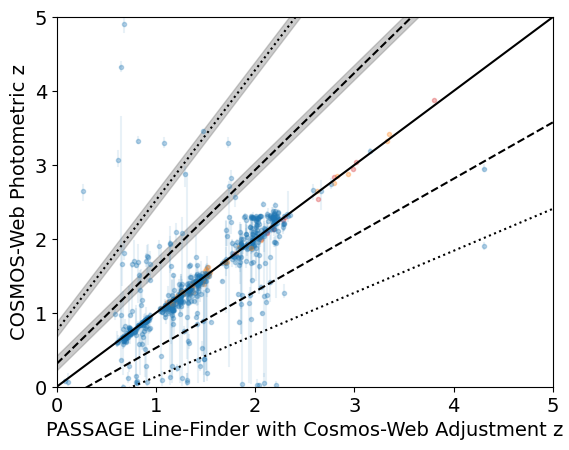

In [36]:
zpas=np.where(df['cosmosz']<0,-1,df['redshift'])#df1['redshift']
zpaserr=np.where(df['cosmosz']<0,-1,df['redshift_error'])#df1['redshift']
zcos=np.where(df['cosmosz']<0,-1,df['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df['cosmosz']<0,-1,df['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df['cosmosz']<0,-1,df['cosmoszup'])#df1['cosmosz']
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    #print(y5007,zpas[i])
    y3727=6565/3727*(1+zpas[i])-1
    if zpas[i]!=-1:
        if np.abs(y5007-zcos[i])<0.1:#(np.abs(zpas[i]=zcos[i])<0.1) and ():
            plt.plot(y5007,zcos[i],".",color='tab:orange',alpha=0.3)
            #plt.plot([zcos[i],zcos[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            #plt.plot([zcos[i]-zpaserr[i],zcos[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)
        elif np.abs(y3727-zcos[i])<0.1:
            #print(zpas[i],zcos[i])
            plt.plot(y3727,zcos[i],".",color='tab:red',alpha=0.3)
            #plt.plot([zcos[i],zcos[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            #plt.plot([zcos[i]-zpaserr[i],zcos[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)
        else:       
            plt.plot(zpas[i],zcos[i],".",color='tab:blue',alpha=0.3)
            plt.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            plt.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)


plt.xlim(0,5)
plt.ylim(0,5)
plt.plot([0,5],[0,5],"k")

x=np.linspace(0,5,20)
y=6565/5007*(1+x)-1
plt.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)


y=6565/3727*(1+x)-1
plt.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha
plt.fill_between(x, y-0.1, y+0.1,color='gray',alpha=0.4)

x=np.linspace(0,5,20)
y=5007/6565*(1+x)-1
plt.plot(x,y,"k--")#this is for if for cosmos thinks H alpha and we thought in passage is oIII

y=3727/6565*(1+x)-1
plt.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha

plt.xlabel('PASSAGE Line-Finder with Cosmos-Web Adjustment z', fontsize=14)
plt.ylabel('COSMOS-Web Photometric z', fontsize=14)
plt.xticks(fontsize=14) 
# Increase font size for y-axis tick labels
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)

0.08421809529208786


(array([0., 1., 2., 3., 4., 5.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5')])

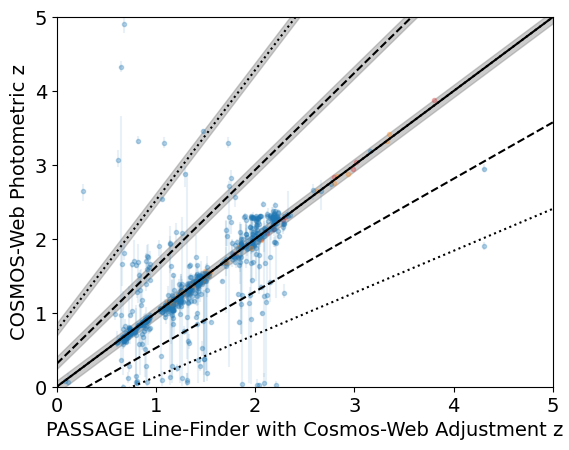

In [47]:
zpas=np.where(df['cosmosz']<0,-1,df['redshift'])#df1['redshift']
zpaserr=np.where(df['cosmosz']<0,-1,df['redshift_error'])#df1['redshift']
zcos=np.where(df['cosmosz']<0,-1,df['cosmosz'])#df1['cosmosz']
zcoslow=np.where(df['cosmosz']<0,-1,df['cosmoszlow'])#df1['cosmosz']
zcosup=np.where(df['cosmosz']<0,-1,df['cosmoszup'])#df1['cosmosz']

zdiff=zpas-zcos
zdiff=np.where(zdiff==0,np.nan,zdiff)
zdiff=np.where(np.abs(zdiff)>0.25,np.nan,zdiff)
cutoff=np.nanstd(zdiff)
print(cutoff)
for i in range(len(zpas)):
    y5007=6565/5007*(1+zpas[i])-1
    #print(y5007,zpas[i])
    y3727=6565/3727*(1+zpas[i])-1
    if zpas[i]!=-1:
        if np.abs(y5007-zcos[i])<cutoff:#(np.abs(zpas[i]=zcos[i])<0.1) and ():
            plt.plot(y5007,zcos[i],".",color='tab:orange',alpha=0.3)
            #plt.plot([zcos[i],zcos[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            #plt.plot([zcos[i]-zpaserr[i],zcos[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)
        elif np.abs(y3727-zcos[i])<cutoff:
            #print(zpas[i],zcos[i])
            plt.plot(y3727,zcos[i],".",color='tab:red',alpha=0.3)
            #plt.plot([zcos[i],zcos[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            #plt.plot([zcos[i]-zpaserr[i],zcos[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)
        else:       
            plt.plot(zpas[i],zcos[i],".",color='tab:blue',alpha=0.3)
            plt.plot([zpas[i],zpas[i]],[zcoslow[i],zcosup[i]],color='tab:blue',alpha=0.1)
            plt.plot([zpas[i]-zpaserr[i],zpas[i]+zpaserr[i]],[zcos[i],zcos[i]],color='tab:blue',alpha=0.1)


plt.xlim(0,5)
plt.ylim(0,5)
plt.plot([0,5],[0,5],"k")

x=np.linspace(0,5,20)
y=6565/5007*(1+x)-1
plt.plot(x,y,"k--")#this is for if cosmos is 5007 and we thought in passage is h alpha
plt.fill_between(x, y-cutoff, y+cutoff,color='gray',alpha=0.4)


y=6565/3727*(1+x)-1
plt.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha
plt.fill_between(x, y-cutoff, y+cutoff,color='gray',alpha=0.4)

y=6565/6565*(1+x)-1
plt.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha
plt.fill_between(x, y-cutoff, y+cutoff,color='gray',alpha=0.4)

x=np.linspace(0,5,20)
y=5007/6565*(1+x)-1
plt.plot(x,y,"k--")#this is for if for cosmos thinks H alpha and we thought in passage is oIII

y=3727/6565*(1+x)-1
plt.plot(x,y,"k:")#this is for if cosmos is oII and passage is h alpha

plt.xlabel('PASSAGE Line-Finder with Cosmos-Web Adjustment z', fontsize=14)
plt.ylabel('COSMOS-Web Photometric z', fontsize=14)
plt.xticks(fontsize=14) 
# Increase font size for y-axis tick labels
plt.yticks(fontsize=14)
#plt.legend(fontsize=12)

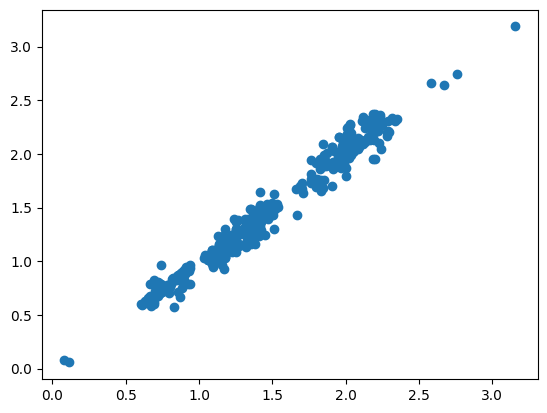

In [45]:
zdiff=zpas-zcos
zpastest=np.where(zdiff==0,np.nan,zpas)
zcostest=np.where(zdiff==0,np.nan,zcos)
zpastest=np.where(np.abs(zdiff)>0.25,np.nan,zpastest)
zcostest=np.where(np.abs(zdiff)>0.25,np.nan,zcostest)
zdiff=np.where(zdiff==0,np.nan,zdiff)
zdiff=np.where(np.abs(zdiff)>0.25,np.nan,zdiff)
plt.scatter(zpastest,zcostest)
#zdiff
#zdiff=np.where(np.abs(zdiff)>0.5,np.nan,zdiff)
#cutoff=np.nanstd(zdiff)